## Causality Written Section
**NUID : 002747160**

**Name : Anshul Singh**

## Abstract

This project delves into the intricate world of causality within the realm of machine learning, distinguishing between mere correlations and genuine causal relationships. It aims to elucidate the concept of causality, its significance in predictive modeling, and the potential pitfalls of ignoring causal inference in data analysis. Through a series of case studies, including the analysis of comic book sales in relation to Disney+ subscriptions and the evaluation of a new user interface for a food ordering app, this work illustrates the complexities and nuances of establishing causality. It introduces readers to various methodologies for causal inference, such as randomization, natural experiments, and conditioning, highlighting their respective strengths and limitations. The project underscores the importance of counterfactual thinking and poses critical "what-if" questions that challenge conventional data analysis approaches. By exploring the intersection of causality and machine learning, this project aims to provide insights that empower data scientists to make more informed, accurate, and ethically responsible decisions in their modeling efforts.

## Introduction to Causality in Machine Learning

What accordingly is meant by causal inference? What does the word "cause" mean? Does knowing cause and effect suffice to grasp causality? Before we begin the game of causality, let's clarify a few points. Around causality and its neighbor correlation, there is a lot of noise.

For instance, the following quotation from François Chollet (shown in Figure 1) adds to the confusion around the subject.
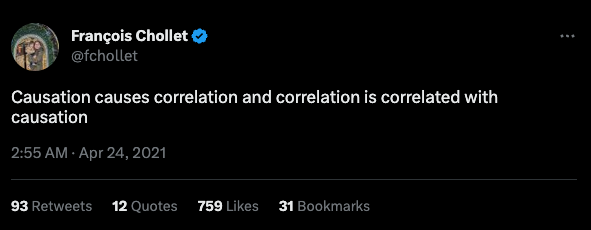

## Correlation and Causation
Correlation does not mean Causation”: If you received a penny each time you encountered that statement, you'd likely be wealthy by now. But why is it that the correlation between two events doesn't necessarily indicate causation? What's the deal with that?

Correlation describes a connection between two variables where changes in one tend to coincide with changes in the other, but it doesn't imply causation. For instance, if you observe many birds in the sky just before it rains, it doesn't mean the birds caused the rain—they simply occurred simultaneously.

Mathematically, correlation is gauged by the correlation coefficient, ranging from -1 to 1. A coefficient of 1 signifies a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 denotes no correlation.

In contrast, causation denotes a relationship where one variable directly influences changes in another.

Now, you might be pondering: with all this talk about causality, is it something I should prioritize?

Let's pose a different query, then.



## Case Study 1: A “Marvelous” Problem

How many times have you looked at the result of your model and wondered what-if the data was something other than what it trained on? You could write an algorithm that predicts the sales of comic books, and your model works well and produces high-accuracy predictions, but you need to know why. Or maybe it’s the opposite, your algorithm predicts completely wrong sales figures, and you need to figure out why.

Confused? Let’s look at an example.

Suppose Marvel hires you as a data scientist. There has been a recent rise in comic book sales, and you need to figure out why so the company can maintain the sales figures. After some data analysis, you conclude that there is a direct correlation between comic book sales and Disney+ subscriptions. But you still don’t have an exact reason, so you develop some scenarios to form a hypothesis.

**Scenario 1: A Direct Cause**

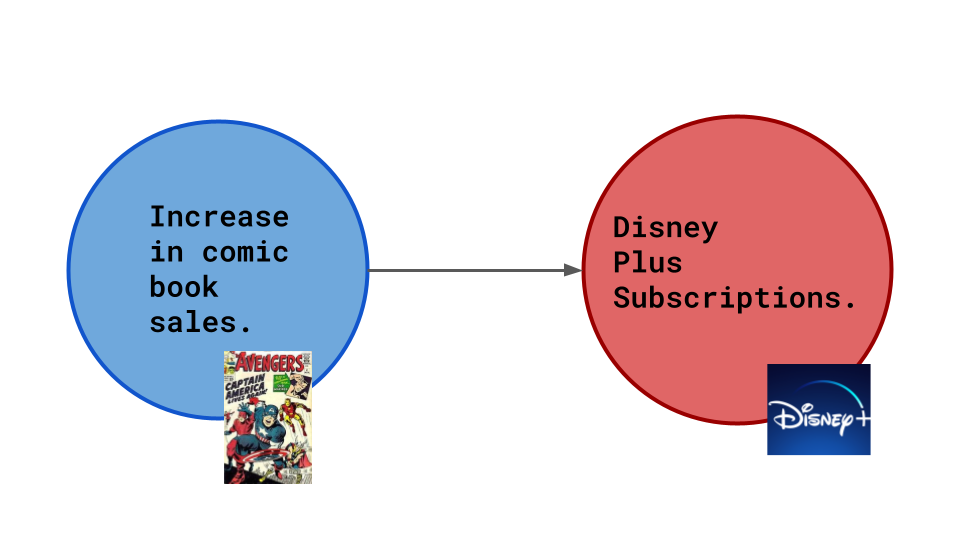

The comics display ads from Disney+, so increased comic book sales cause more Disney+ subscriptions.

## Scenario 2: Reversing the Cause and Effect

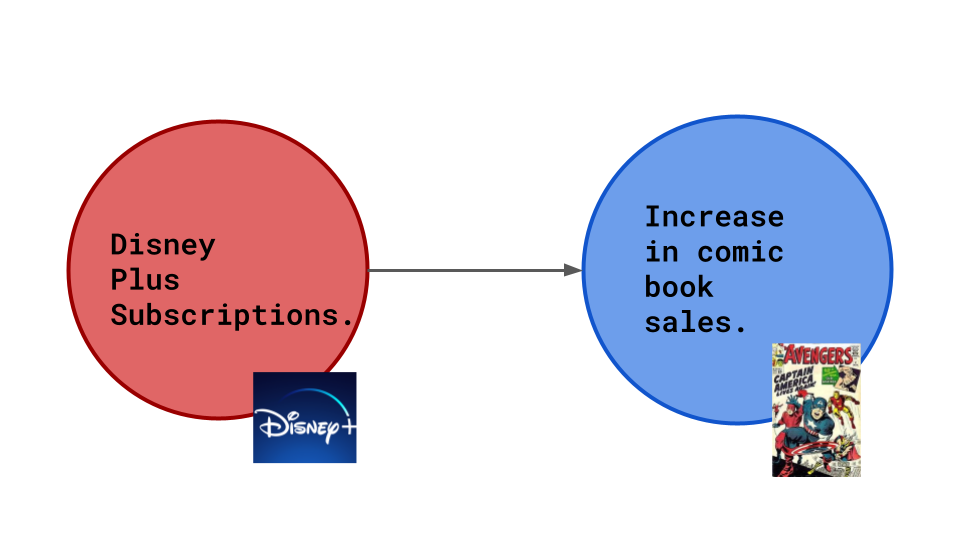

Disney+ has shows about comic book characters. New fans would like to consume more of such content. So an increase in Disney+ subscriptions led to more Marvel Comics being bought.

## Scenario 3: Investigating a Hidden Cause

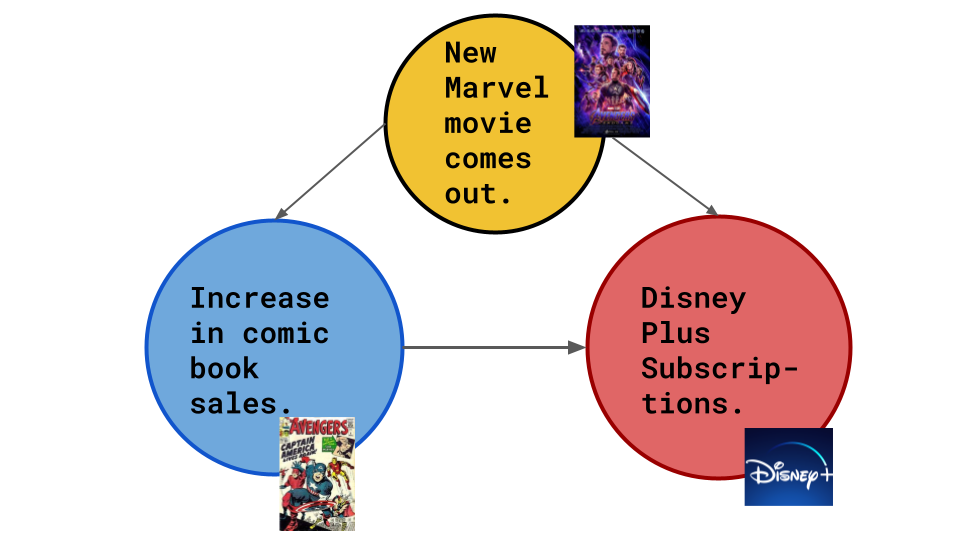

Alternatively, consider this scenario: all Marvel Cinematic Universe films are available on Disney+. When a new Marvel movie premieres, the excitement surrounding these characters results in increased sales of related comic books, consequently driving up subscriptions to Disney+.

## Causal Thinking

In Scenario 3, there's a concept of a hidden cause at play.

In this representation, each node signifies a variable, and the arrows depict the direction of the causal relationship.

Imagine we devise a precise model to forecast when users will increase their purchases of comic books. However, that's the extent of our model's capability. To articulate the problem more effectively, we might pose a question like: What actions would the user have taken if we had intervened differently?

You might think: I understand; the model may overlook hidden causes, yet it still yields accurate predictions.

When both observed and causal effects align in the same direction, it's often seen as fortunate. However, real-world data frequently presents the opposite scenario, as depicted in Figure 5.

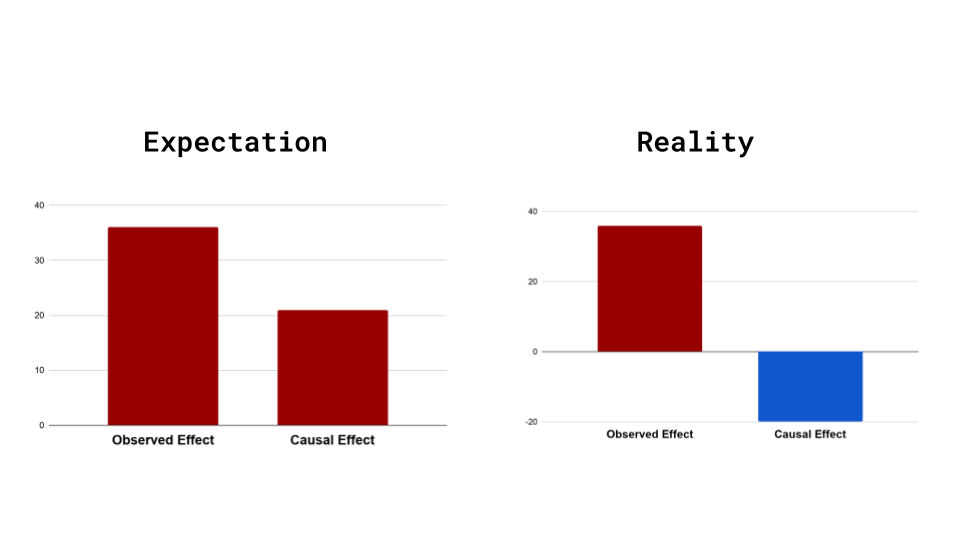

## Case Study 2: Food App Conundrum

Consider another scenario: You've recently joined a food ordering app as a Data Scientist. The product designer is eager to launch a new User Interface (UI) that she believes will enhance user engagement. To assess its effectiveness, she's introduced the new UI to a small group of users and tasked you with analyzing the gathered data.

You opt to evaluate both the old UI and the new one based on a shared criterion: whether users place orders after opening the app. Let's refer to this as the "opened-and-ordered" criterion. Table 1 outlines this assessment.

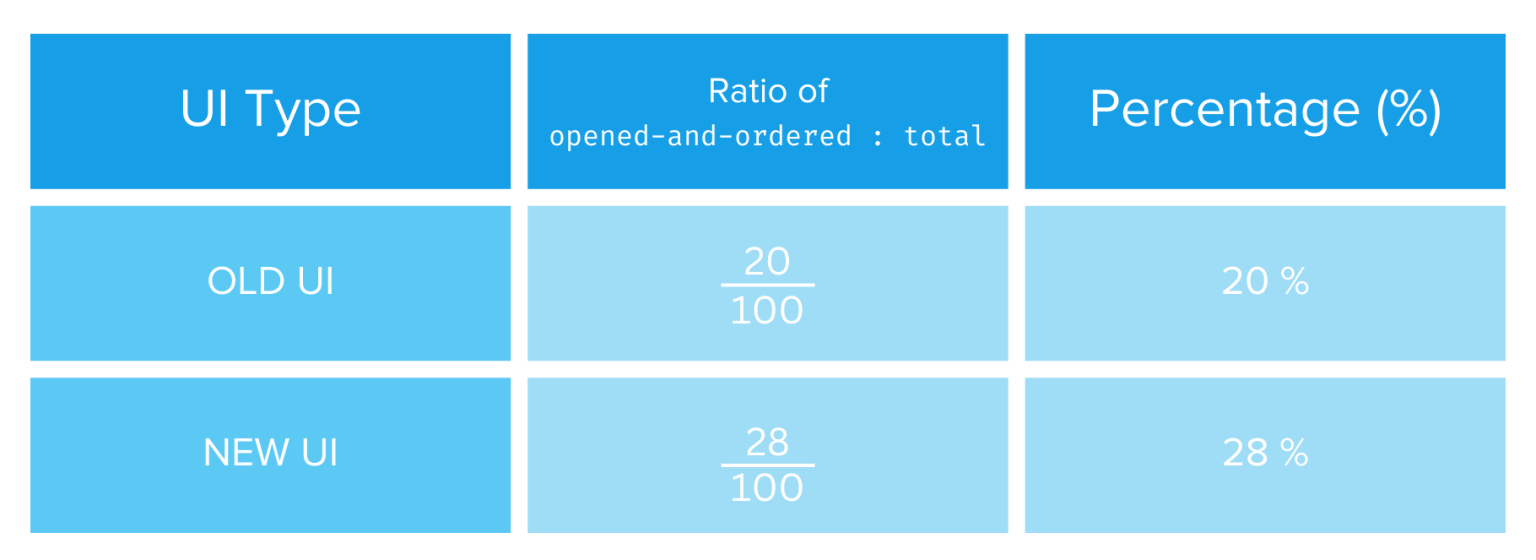


Looking at this data initially, the conclusion seems straightforward: the new UI emerges as the clear victor. However, when you segment the data based on high-activity versus low-activity users, something peculiar occurs, as demonstrated in Table 2.

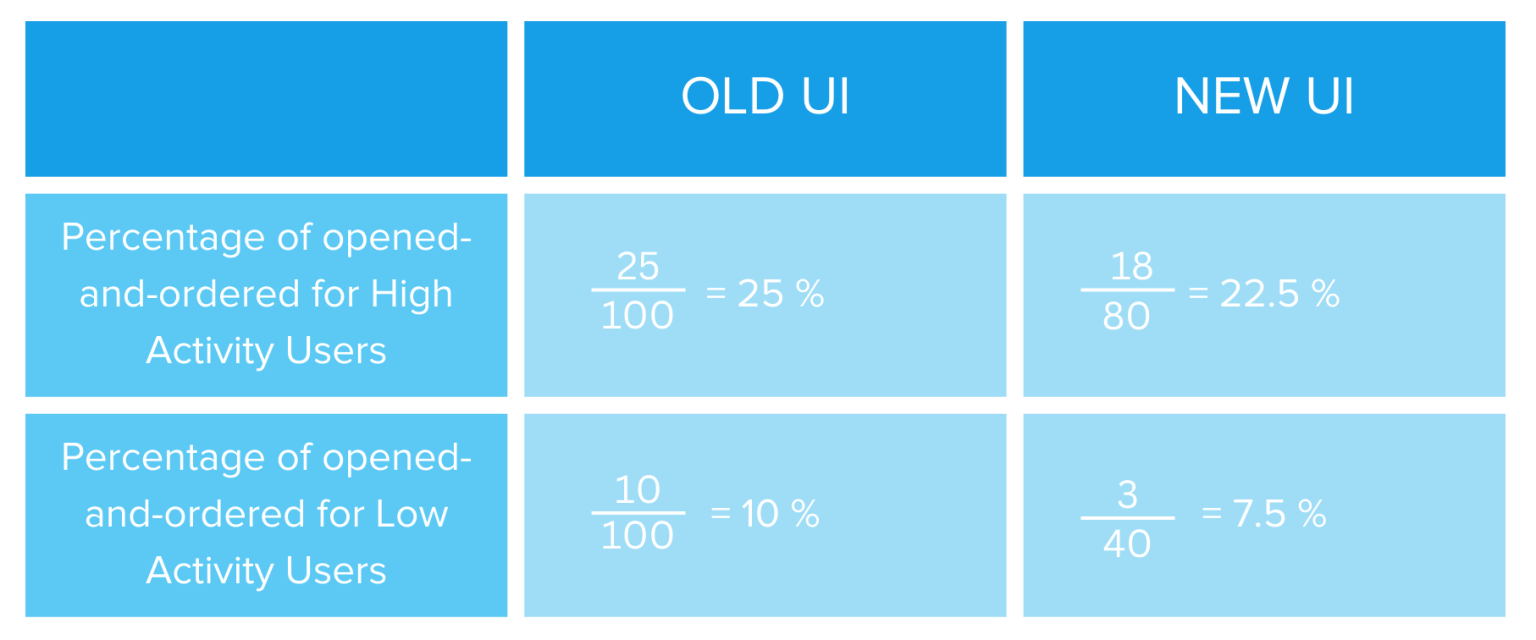

This data discrepancy modeled on a different subset of the original data is called “Simpson’s paradox.”

“But hey, why does this discrepancy occur?”

Well, maybe, since the old UI is already tried and tested, it is shown to users only at a particular time of the day, around the evening, when app activity is generally high. The new UI might be shown at other times of the day when the number of lower-activity users who are likely to order food is less.

The causal diagram may look like the following in Figure 6.

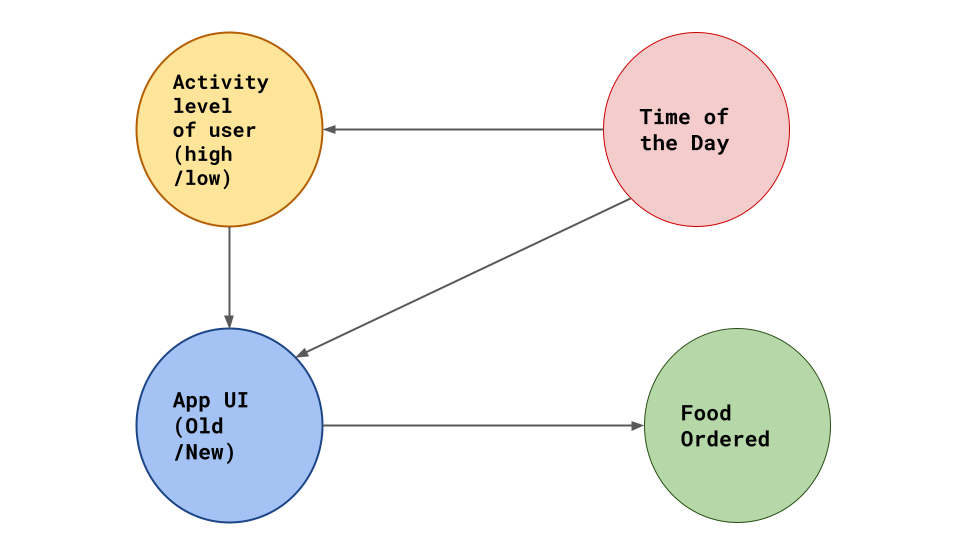

## Summary

So, in conclusion, we learned here that simply because two variables are correlated does not necessarily mean that one is the direct cause of the other. We can do more harm through our model if we do not look for hidden causes and their effects.

Therefore the idea of what would happen had something in the observation process been changed becomes an imperative question to ask.

This is called Counterfactual Thinking.

Counterfactual thinking, specifically about what-if scenarios, is the heart of causal inference.

Some ways we can answer a counterfactual question are:

-Randomization

-Natural Experiments

-Conditioning

Interestingly, the methods become much harder to use as we go down the list. But as we go up, the methods are more foolproof and give better validation results. We will closely examine these and the various underlying methodologies in the next blog post of this series. Till then, keep learning, and don’t stop asking the question: What-If?



## Worked example 1 - Risk Analysis in Finance

In [31]:
%pip install xgboost
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from collections import Counter
from tqdm import tqdm

import pickle
import warnings
import itertools

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Uploading Data

In [32]:
seed = 42

random.seed(seed)
np.random.seed(seed)

df_app = pd.read_csv("application_data.csv")
df_desq = pd.read_csv("columns_description.csv")
df_desq = df_desq[["Table", "Row", "Description", "Special"]]
df_desq = df_desq[df_desq["Table"]=="application_data"]
print(f"Dimensions of the application datafarame: {df_app.shape}")
print(f"Dimensions of the columns description datafarame: {df_desq.shape}")

Dimensions of the application datafarame: (307511, 122)
Dimensions of the columns description datafarame: (122, 4)


## Quick View

In [33]:
# as dimension is quite high, I'll set pandas to show all rows/columns instead of couple of them
pd.set_option("display.max_rows", None, "display.max_columns", None)
# also let's set pandas to show full text in dataframe as previous application contains
# description of other variables
pd.set_option('display.max_colwidth', None)

In [34]:
df_app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Descritpion

In [35]:
df_desq

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


In [36]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Cleaning

### 1) Check Missing Values

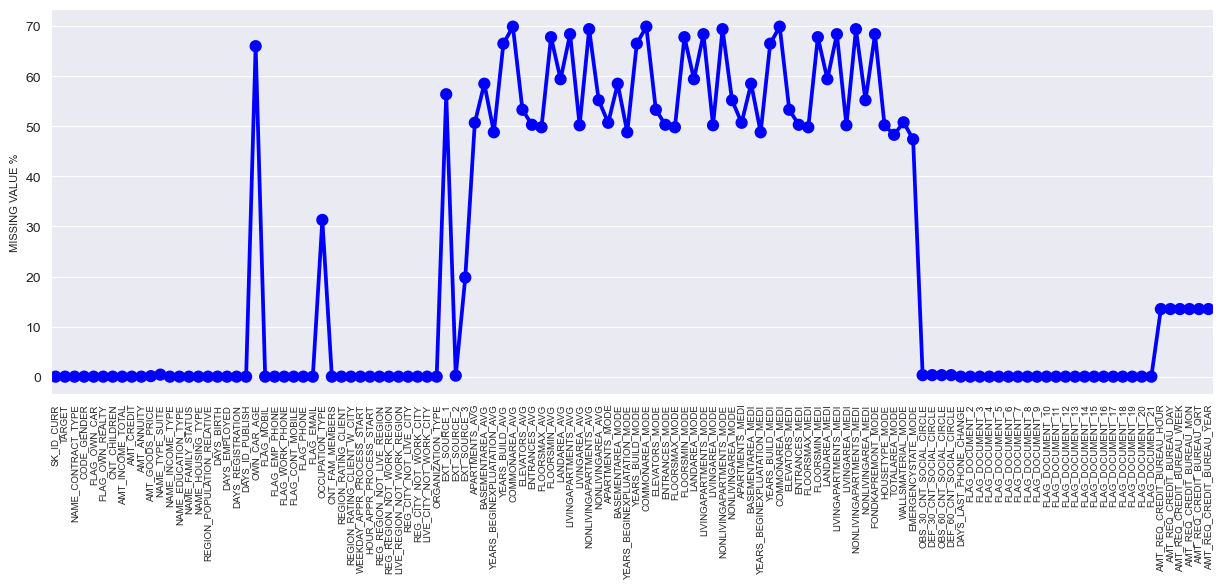

In [37]:
# application dataframe
plt.figure(figsize=(15,5))
sns.pointplot(x=list(df_app.columns),
              y=list(round(df_app.isnull().sum()/df_app.shape[0] * 100, 1)),
              color="b")
plt.ylabel("MISSING VALUE %", size=8)
plt.xticks(rotation='vertical', size=7)
plt.show()

### 2) Handling Missing Values
Firstly let's count how many variable we have with more than 40% missing values (probably we will have to remove them as filling ~50% missing values would be too much)

In [38]:
n1 = sum(round(df_app.isnull().sum()/df_app.shape[0] * 100, 1) > 40)
print(f"Number of columns with more than 40% missing values in df_app {n1}/{df_app.shape[1]}")

Number of columns with more than 40% missing values in df_app 49/122


In [39]:
# Check & record these columns 
df_cols_to_remove = []
for i, j in round(df_app.isnull().sum()/df_app.shape[0] * 100, 8).iteritems():
    if j>40:
        print(i, str(j)+"%")
        df_cols_to_remove.append(i)

OWN_CAR_AGE 65.99081008%
EXT_SOURCE_1 56.38107255%
APARTMENTS_AVG 50.74972928%
BASEMENTAREA_AVG 58.51595553%
YEARS_BEGINEXPLUATATION_AVG 48.78101922%
YEARS_BUILD_AVG 66.49778382%
COMMONAREA_AVG 69.87229725%
ELEVATORS_AVG 53.29597966%
ENTRANCES_AVG 50.34876801%
FLOORSMAX_AVG 49.76082156%
FLOORSMIN_AVG 67.84862981%
LANDAREA_AVG 59.37673774%
LIVINGAPARTMENTS_AVG 68.35495316%
LIVINGAREA_AVG 50.19332642%
NONLIVINGAPARTMENTS_AVG 69.43296337%
NONLIVINGAREA_AVG 55.17916432%
APARTMENTS_MODE 50.74972928%
BASEMENTAREA_MODE 58.51595553%
YEARS_BEGINEXPLUATATION_MODE 48.78101922%
YEARS_BUILD_MODE 66.49778382%
COMMONAREA_MODE 69.87229725%
ELEVATORS_MODE 53.29597966%
ENTRANCES_MODE 50.34876801%
FLOORSMAX_MODE 49.76082156%
FLOORSMIN_MODE 67.84862981%
LANDAREA_MODE 59.37673774%
LIVINGAPARTMENTS_MODE 68.35495316%
LIVINGAREA_MODE 50.19332642%
NONLIVINGAPARTMENTS_MODE 69.43296337%
NONLIVINGAREA_MODE 55.17916432%
APARTMENTS_MEDI 50.74972928%
BASEMENTAREA_MEDI 58.51595553%
YEARS_BEGINEXPLUATATION_MEDI 48.781

In [40]:
print(f"Shape of df_app before dropping: {df_app.shape}")
df_app = df_app[list(set(df_app.columns)-set(df_cols_to_remove))]
print(f"Shape of df_app after dropping: {df_app.shape}")
df_app = df_app[sorted(list(df_app.columns))]

Shape of df_app before dropping: (307511, 122)
Shape of df_app after dropping: (307511, 73)


In [41]:
left_cols_app = []
for i, j in round(df_app.isnull().sum()/df_app.shape[0] * 100, 2).iteritems():
    if j>0:
        print(i, str(j)+"%")
        left_cols_app.append(i)

AMT_GOODS_PRICE 0.09%
AMT_REQ_CREDIT_BUREAU_DAY 13.5%
AMT_REQ_CREDIT_BUREAU_HOUR 13.5%
AMT_REQ_CREDIT_BUREAU_MON 13.5%
AMT_REQ_CREDIT_BUREAU_QRT 13.5%
AMT_REQ_CREDIT_BUREAU_WEEK 13.5%
AMT_REQ_CREDIT_BUREAU_YEAR 13.5%
DEF_30_CNT_SOCIAL_CIRCLE 0.33%
DEF_60_CNT_SOCIAL_CIRCLE 0.33%
EXT_SOURCE_2 0.21%
EXT_SOURCE_3 19.83%
NAME_TYPE_SUITE 0.42%
OBS_30_CNT_SOCIAL_CIRCLE 0.33%
OBS_60_CNT_SOCIAL_CIRCLE 0.33%
OCCUPATION_TYPE 31.35%


In [42]:
non_missing_cols = []
for i, j in round(df_app.isnull().sum()/df_app.shape[0] * 100, 1).iteritems():
    if j==0:
        non_missing_cols.append(i)

In [43]:
df_app[left_cols_app].describe()

,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,3.072330e+05,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,3.068510e+05,246546.000000,306490.000000,306490.000000
mean,5.383962e+05,0.007000,0.006402,0.267395,0.265474,0.034362,1.899974,0.143421,0.100049,5.143927e-01,0.510853,1.422245,1.405292
std,3.694465e+05,0.110757,0.083849,0.916002,0.794056,0.204685,1.869295,0.446698,0.362291,1.910602e-01,0.194844,2.400989,2.379803
min,4.050000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000
25%,2.385000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000
50%,4.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000
75%,6.795000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,2.000000
max,4.050000e+06,9.000000,4.000000,27.000000,261.000000,8.000000,25.000000,34.000000,24.000000,8.549997e-01,0.896010,348.000000,344.000000


#####  2.1) Separate Categorical/Numerical Columns (columns with missing values)

In [44]:
df_desq[df_desq["Row"].isin(left_cols_app)]

,Table,Row,Description,Special
10,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
11,application_data,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,NaN
28,application_data,OCCUPATION_TYPE,What kind of occupation does the client have,NaN
42,application_data,EXT_SOURCE_2,Normalized score from external data source,normalized
43,application_data,EXT_SOURCE_3,Normalized score from external data source,normalized
91,application_data,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 30 DPD (days past due) default,NaN
92,application_data,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 30 DPD (days past due),NaN
93,application_data,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 60 DPD (days past due) default,NaN
94,application_data,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 60 (days past due) DPD,NaN
116,application_data,AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the client one hour before application,NaN


In [45]:
numerical_features = ["AMT_GOODS_PRICE", "EXT_SOURCE_2", "EXT_SOURCE_3",
                      "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                      "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
                      "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
                      "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
                      "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
categorica_features = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE"]

* Firstly I'll fill missing values in categorical features;
* For numerical features I want to use KNNImputer.

##### 2.2) **NAME_TYPE_SUITE**

In [46]:
print("Number of missing values in NAME_TYPE_SUITE: {}".format(df_app[["NAME_TYPE_SUITE"]].isnull().sum()[0]))

Number of missing values in NAME_TYPE_SUITE: 1292


In [47]:
round(df_app["NAME_TYPE_SUITE"].value_counts()/sum(df_app["NAME_TYPE_SUITE"].value_counts()) * 100, 1)

Unaccompanied      81.2
Family             13.1
Spouse, partner     3.7
Children            1.1
Other_B             0.6
Other_A             0.3
Group of people     0.1
Name: NAME_TYPE_SUITE, dtype: float64

**Solution:** 
* As 81.2% of the observation belongs to "Unacompanied" class, it should be fine if we replce missing values with it.

##### 2.3) **OCCUPATION_TYPE**

In [48]:
print("Number of missing values in OCCUPATION_TYPE: {}".format(df_app[["OCCUPATION_TYPE"]].isnull().sum()[0]))

Number of missing values in OCCUPATION_TYPE: 96391


In [49]:
round(df_app["OCCUPATION_TYPE"].value_counts()/sum(df_app["OCCUPATION_TYPE"].value_counts()) * 100, 1)

Laborers                 26.1
Sales staff              15.2
Core staff               13.1
Managers                 10.1
Drivers                   8.8
High skill tech staff     5.4
Accountants               4.6
Medicine staff            4.0
Security staff            3.2
Cooking staff             2.8
Cleaning staff            2.2
Private service staff     1.3
Low-skill Laborers        1.0
Waiters/barmen staff      0.6
Secretaries               0.6
Realty agents             0.4
HR staff                  0.3
IT staff                  0.2
Name: OCCUPATION_TYPE, dtype: float64

In [50]:
dic = {"Laborers": 26.1, "Sales staff": 15.2, "Core staff": 13.1,
       "Managers": 10.1, "Drivers": 8.8}
weights = [dic[weight] / sum(dic.values()) for weight in dic.keys()]
print(weights)

[0.35607094133697137, 0.2073669849931787, 0.17871759890859482, 0.1377899045020464, 0.12005457025920875]


**Solution:** 
* There are 5 dominant classes, so filling missing values with randomly chosen class from these categories (with corresponding weights) should work fine.

##### 2.4) Filling missing values in **NAME_TYPE_SUITE** / **OCCUPATION_TYPE**

In [51]:
df_app["NAME_TYPE_SUITE"].fillna("Unaccompanied", inplace=True)

In [52]:
random.seed(4444)
values = random.choices(list(dic.keys()), weights=weights, k=96391)
df_app.loc[df_app["OCCUPATION_TYPE"].isna(), "OCCUPATION_TYPE"] = values

In [53]:
numerical_features

['AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

##### 2.5) **CHECK MISSING VALUE GRAPH**

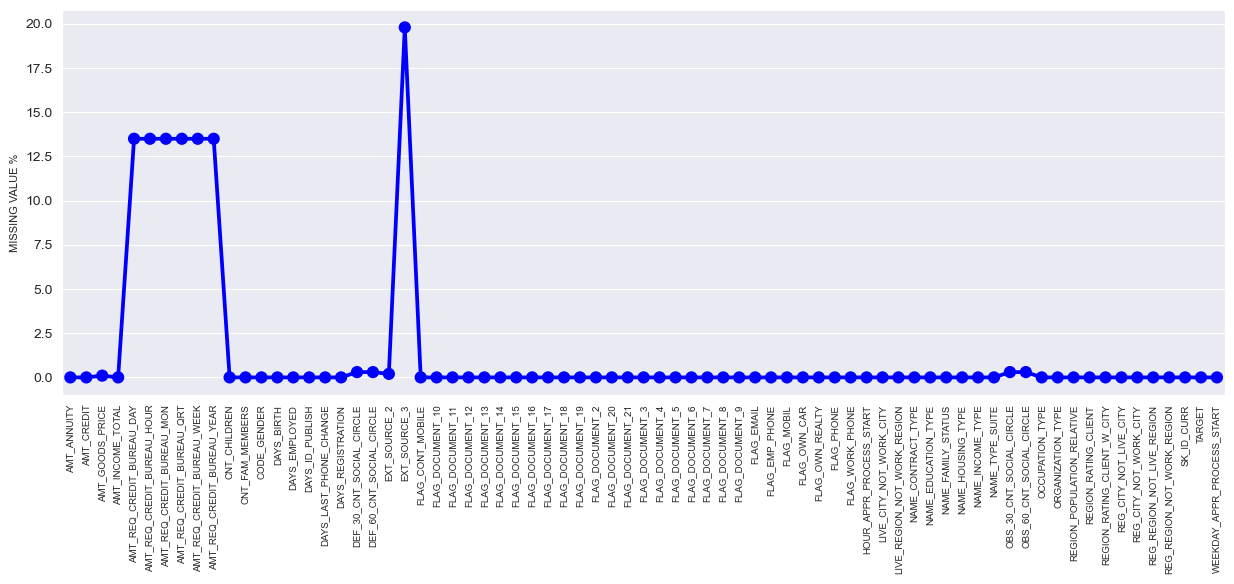

In [54]:
plt.figure(figsize=(15,5))
sns.pointplot(x=list(df_app.columns),
              y=list(round(df_app.isnull().sum()/df_app.shape[0] * 100, 1)),
              color="b")
plt.ylabel("MISSING VALUE %", size=8)
plt.xticks(rotation='vertical', size=7)
plt.show()

Seems AMT variables have most of the missing values.

##### 2.6) **AMT_GOODS_PRICE**

In [55]:
print("Number of missing values in AMT_GOODS_PRICE: {}".format(df_app[["AMT_GOODS_PRICE"]].isnull().sum()[0]))

Number of missing values in AMT_GOODS_PRICE: 278


In [56]:
df_app["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

**Solution:** 
* There are few missing values in this column (not even 1% of observations), so filling it with simple median (4.500000e+05) should work fine.

##### 2.7) **EXT_SOURCE_2**

In [57]:
print("Number of missing values in EXT_SOURCE_2: {}".format(df_app[["EXT_SOURCE_2"]].isnull().sum()[0]))

Number of missing values in EXT_SOURCE_2: 660


In [58]:
df_app["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

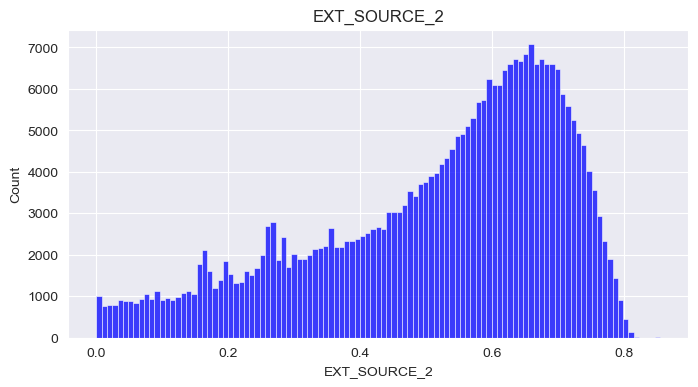

In [59]:
plt.figure(figsize=(8,4))
sns.histplot(df_app["EXT_SOURCE_2"],color="b")
plt.title("EXT_SOURCE_2")
plt.show()

**Solution:** 
* Here number of outliers is about 1.5%, so missing values with median should work fine (5.659614e-01).

In [60]:
df_app[["TARGET"]].head()

,TARGET
0,1
1,0
2,0
3,0
4,0


##### 2.7) **EXT_SOURCE_3**

In [61]:
print("Number of missing values in EXT_SOURCE_3: {}".format(df_app[["EXT_SOURCE_3"]].isnull().sum()[0]))

Number of missing values in EXT_SOURCE_3: 60965


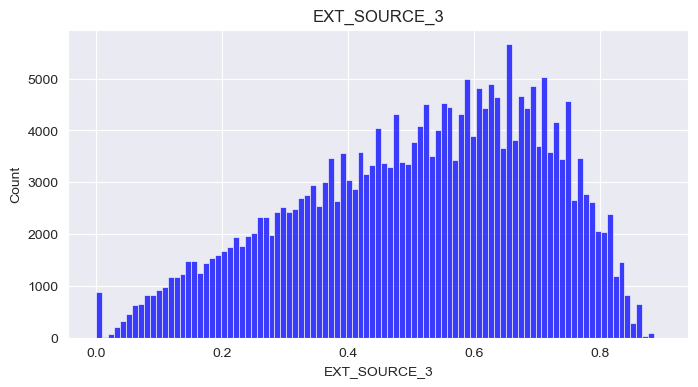

In [62]:
plt.figure(figsize=(8,4))
sns.histplot(df_app["EXT_SOURCE_3"],color="b")
plt.title("EXT_SOURCE_3")
plt.show()

**Solution:** 
* 19.8% of observations are missing in EXT_SOURCE_3. 20% is quite high, so filling observations with simple median or mean should not be appropriate idea. I think leaving this columns as it is and let algorithms to take care of missing values (I want to use XGBoost in this case which supports missing values by default).

##### 2.8) **OBS_30_CNT_SOCIAL_CIRCLE**

In [63]:
print("Number of missing values in OBS_30_CNT_SOCIAL_CIRCLE: {}".format(df_app[["OBS_30_CNT_SOCIAL_CIRCLE"]].isnull().sum()[0]))

Number of missing values in OBS_30_CNT_SOCIAL_CIRCLE: 1021


In [64]:
df_app["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [65]:
dic_1 = {0: 163910, 1: 48783, 2: 29808,
       3: 20322, 4: 14143}
weights_1 = [dic_1[weights] / sum(dic_1.values()) for weights in dic_1.keys()]
print(weights_1)

[0.5918054923709047, 0.17613353263577478, 0.10762331838565023, 0.07337362708780139, 0.05106402951986887]


**Soution**
* This values in this column is discrete, so I'll use the five most common value and choose randomly from them with corresponding weights.

##### 2.9) **DEF_30_CNT_SOCIAL_CIRCLE**

In [66]:
print("Number of missing values in DEF_30_CNT_SOCIAL_CIRCLE: {}".format(df_app[["DEF_30_CNT_SOCIAL_CIRCLE"]].isnull().sum()[0]))

Number of missing values in DEF_30_CNT_SOCIAL_CIRCLE: 1021


In [67]:
df_app["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

**Solution**
* Here dominant value is 0.0, so filling these ~1000 observations with it should not be a ploblem.

##### 2.10) **OBS_60_CNT_SOCIAL_CIRCLE**

In [68]:
print("Number of missing values in OBS_60_CNT_SOCIAL_CIRCLE: {}".format(df_app[["OBS_60_CNT_SOCIAL_CIRCLE"]].isnull().sum()[0]))

Number of missing values in OBS_60_CNT_SOCIAL_CIRCLE: 1021


In [69]:
df_app["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [70]:
dic_2 = {0: 164666, 1: 48870, 2: 29766,
         3: 20215, 4: 13946}
weights_2 = [dic_2[weights] / sum(dic_2.values()) for weights in dic_2.keys()]
print(weights_2)

[0.5934701203403697, 0.1761315923204175, 0.10727916875403207, 0.07285656105498751, 0.050262557530193215]


**Soution**
* Here randomly chosen values from the five most common values with weighted probabilities should work fine.

##### 2.11) **DEF_60_CNT_SOCIAL_CIRCLE**

In [72]:
print("Number of missing values in DEF_60_CNT_SOCIAL_CIRCLE: {}".format(df_app[["DEF_60_CNT_SOCIAL_CIRCLE"]].isnull().sum()[0]))

Number of missing values in DEF_60_CNT_SOCIAL_CIRCLE: 1021


In [73]:
df_app["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

**Solution**
* Here dominant value is 0.0, so filling these ~1000 observations with it should not be a ploblem.

##### 2.12 **AMT** VARIABLES CORRELATION TO TARGET

In [74]:
df_app[["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
        "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR",
        "TARGET"]].corr()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
AMT_REQ_CREDIT_BUREAU_HOUR,1.000000,0.230374,0.004706,-0.000018,-0.002716,-0.004597,0.000930
AMT_REQ_CREDIT_BUREAU_DAY,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355,0.002704
AMT_REQ_CREDIT_BUREAU_WEEK,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917,0.000788
AMT_REQ_CREDIT_BUREAU_MON,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975,-0.012462
AMT_REQ_CREDIT_BUREAU_QRT,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208,-0.002022
AMT_REQ_CREDIT_BUREAU_YEAR,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000,0.019930
TARGET,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,1.000000


**Solution** 
* Correlation coefficient between TARGET and AMT variables are very low so probably it would be better if we drop these variables rather than filling more than 40,000 observation in 6 column.

##### 2.13) DROP **AMT** VARIABLES

In [75]:
df_app.drop(["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
             "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR",
            ], axis=1, inplace=True)

##### 2.14) FILL MISSING VALUES

In [76]:
df_app.isnull().sum()

AMT_ANNUITY                       12
AMT_CREDIT                         0
AMT_GOODS_PRICE                  278
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
CNT_FAM_MEMBERS                    2
CODE_GENDER                        0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
DAYS_LAST_PHONE_CHANGE             1
DAYS_REGISTRATION                  0
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
FLAG_CONT_MOBILE                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_19                   0
F

In [77]:
random.seed(4444)
df_app["AMT_GOODS_PRICE"].fillna(4.500000e+05, inplace=True)
df_app["EXT_SOURCE_2"].fillna(5.659614e-01, inplace=True)

In [78]:
values_1 = random.choices(list(dic_1.keys()), weights=weights_1,k=1021)
df_app.loc[df_app["OBS_30_CNT_SOCIAL_CIRCLE"].isna(), "OBS_30_CNT_SOCIAL_CIRCLE"] = values_1

df_app["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)

values_2 = random.choices(list(dic_2.keys()), weights=weights_2,k=1021)
df_app.loc[df_app["OBS_60_CNT_SOCIAL_CIRCLE"].isna(), "OBS_60_CNT_SOCIAL_CIRCLE"] = values_2

df_app["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)

##### 2.15) FILL **AMT_ANNUITY** & **CNT_FAM_MEMBERS** & **DAYS_LAST_PHONE_CHANGE**

In [79]:
df_app["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [80]:
df_app["CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [81]:
df_app["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [82]:
df_app["AMT_ANNUITY"].fillna(24903.0, inplace=True)
df_app["CNT_FAM_MEMBERS"].fillna(2.0, inplace=True)
df_app["DAYS_LAST_PHONE_CHANGE"].fillna(-757.0, inplace=True)

In [83]:
df_app.isnull().sum()

AMT_ANNUITY                        0
AMT_CREDIT                         0
AMT_GOODS_PRICE                    0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
CNT_FAM_MEMBERS                    0
CODE_GENDER                        0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
DAYS_LAST_PHONE_CHANGE             0
DAYS_REGISTRATION                  0
DEF_30_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
EXT_SOURCE_2                       0
EXT_SOURCE_3                   60965
FLAG_CONT_MOBILE                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_19                   0
F

### 3) Converting Negative Columns (DAYS) to Positive

In [84]:
df_app[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH",
        "DAYS_LAST_PHONE_CHANGE", "DAYS_REGISTRATION"]].head(3)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION
0,-9461,-637,-2120,-1134.0,-3648.0
1,-16765,-1188,-291,-828.0,-1186.0
2,-19046,-225,-2531,-815.0,-4260.0


In [85]:
day_cols = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE", "DAYS_REGISTRATION"]
for col in day_cols:
    print(col, "MIN:", df_app[col].min(), "MAX:", df_app[col].max())

DAYS_BIRTH MIN: -25229 MAX: -7489
DAYS_EMPLOYED MIN: -17912 MAX: 365243
DAYS_ID_PUBLISH MIN: -7197 MAX: 0
DAYS_LAST_PHONE_CHANGE MIN: -4292.0 MAX: 0.0
DAYS_REGISTRATION MIN: -24672.0 MAX: 0.0


In [86]:
df_app[df_app["DAYS_EMPLOYED"]>0].shape

(55374, 67)

All of the values of the variables except **DAYS_EMPLOYED** are in interval (-∞;0]. As these variables are measured in negative days, positive values does not make sense, so this should be some issue. As number if observations with positive values are quite high (about 55000), dropping them should not be good choice; instead, let's nullify them and see how it will work.

In [87]:
df_app.loc[df_app["DAYS_EMPLOYED"]>0, "DAYS_EMPLOYED"] = 0

In [88]:
df_app["DAYS_BIRTH"] = abs(df_app["DAYS_BIRTH"])
df_app["DAYS_EMPLOYED"] = abs(df_app["DAYS_EMPLOYED"])
df_app["DAYS_ID_PUBLISH"] = abs(df_app["DAYS_ID_PUBLISH"])
df_app["DAYS_LAST_PHONE_CHANGE"] = abs(df_app["DAYS_LAST_PHONE_CHANGE"])
df_app["DAYS_REGISTRATION"] = abs(df_app["DAYS_REGISTRATION"])

### 4) Separate Categorical/Numerical Columns

In [89]:
df_app.head(3)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,WEEKDAY_APPR_PROCESS_START
0,24700.5,406597.5,351000.0,202500.0,0,1.0,M,9461,637,2120,1134.0,3648.0,2.0,2.0,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,10,0,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,2.0,2.0,Laborers,Business Entity Type 3,0.018801,2,2,0,0,0,0,100002,1,WEDNESDAY
1,35698.5,1293502.5,1129500.0,270000.0,0,2.0,F,16765,1188,291,828.0,1186.0,0.0,0.0,0.622246,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,N,1,0,11,0,0,Cash loans,Higher education,Married,House / apartment,State servant,Family,1.0,1.0,Core staff,School,0.003541,1,1,0,0,0,0,100003,0,MONDAY
2,6750.0,135000.0,135000.0,67500.0,0,1.0,M,19046,225,2531,815.0,4260.0,0.0,0.0,0.555912,0.729567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Y,Y,1,1,9,0,0,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0,0.0,Laborers,Government,0.010032,2,2,0,0,0,0,100004,0,MONDAY


In [90]:
categorical_features = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_CONTRACT_TYPE",
                        "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
                        "NAME_INCOME_TYPE", "NAME_TYPE_SUITE", "OCCUPATION_TYPE",
                        "ORGANIZATION_TYPE", "WEEKDAY_APPR_PROCESS_START"]

numerical_features = ["AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE", "AMT_INCOME_TOTAL",
                      "CNT_CHILDREN", "CNT_FAM_MEMBERS", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH",
                      "DAYS_LAST_PHONE_CHANGE", "DAYS_REGISTRATION", "DEF_30_CNT_SOCIAL_CIRCLE",
                      "DEF_60_CNT_SOCIAL_CIRCLE", "EXT_SOURCE_2", "EXT_SOURCE_3", "FLAG_CONT_MOBILE",
                      "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
                      "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
                      "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_20",
                      "FLAG_DOCUMENT_21", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5",
                      "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9",
                      "FLAG_EMAIL", "FLAG_EMP_PHONE", "FLAG_MOBIL", "FLAG_PHONE", "FLAG_WORK_PHONE", 
                      "HOUR_APPR_PROCESS_START", "LIVE_CITY_NOT_WORK_CITY", "LIVE_REGION_NOT_WORK_REGION", 
                      "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE",
                      "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_CITY_NOT_LIVE_CITY",
                      "REG_CITY_NOT_WORK_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
                      "SK_ID_CURR", "TARGET"]

## Explanatory Data Analysis

In [91]:
df_app.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL',
       'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_PHONE', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START',
       'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION

##### 1.1) DISTRIBUTION of **TARGET**

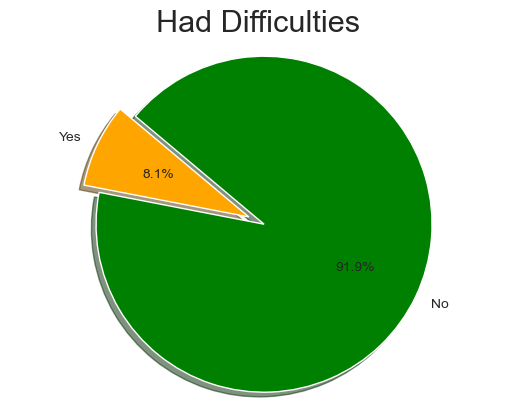

In [92]:
labels = 'Yes', 'No',
sizes = [(df_app.loc[df_app['TARGET']==1].shape[0] / df_app.shape[0])*100, 100-(df_app.loc[df_app['TARGET']==1].shape[0] / df_app.shape[0])*100]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140, colors=['orange', 'g'])
ax1.axis('equal')

plt.title('Had Difficulties', size=22)

plt.show()

##### 1.2) DISTRIBUTION of **GENDER**

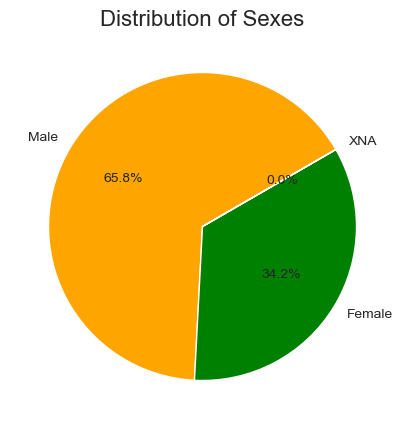

In [93]:
plt.figure(figsize=(5,5))
plt.pie(df_app['CODE_GENDER'].value_counts().tolist(), labels=['Male', 'Female', 'XNA'],
        colors=['orange', 'green'], autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Sexes', size=16)
plt.show()

##### 1.3) **AMT** Variables

* **AMT_ANNUITY**: Loan annuity;
* **AMT_CREDIT**: Credit amount of the loan;
* **AMT_GOODS_PRICE**: For consumer loans it is the price of the goods for which the loan is given;
* **AMT_INCOME_TOTAL**: Income of the client.

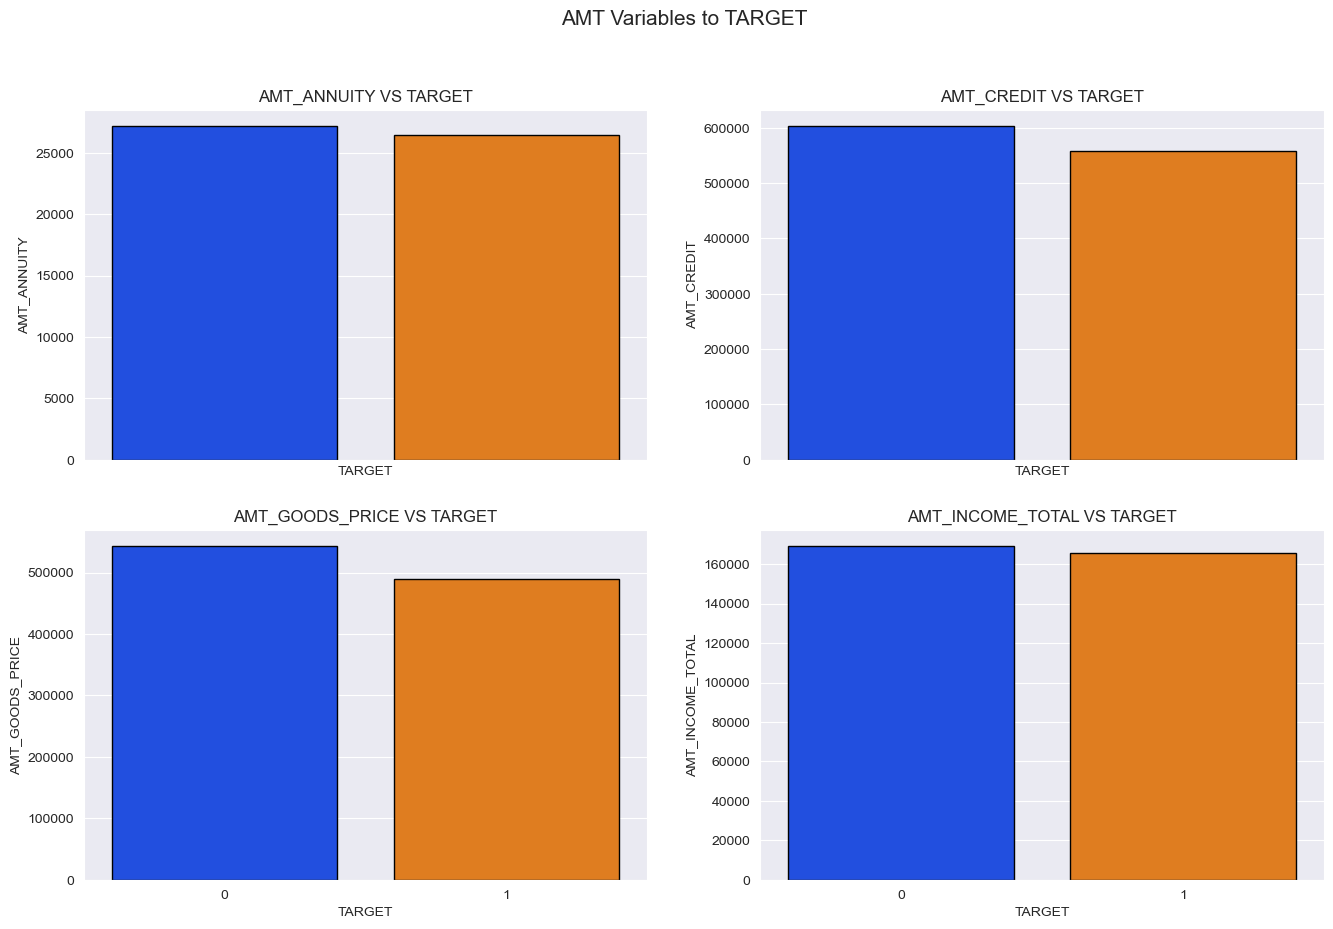

In [94]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,10))
sns.barplot(ax=axes[0,0], x=df_app["TARGET"],y=df_app["AMT_ANNUITY"],ci=None, edgecolor="black", palette="bright")
axes[0,0].set_title("AMT_ANNUITY VS TARGET")

sns.barplot(ax=axes[0,1], x=df_app["TARGET"],y=df_app["AMT_CREDIT"],ci=None, edgecolor="black", palette="bright")
axes[0,1].set_title("AMT_CREDIT VS TARGET")

sns.barplot(ax=axes[1,0], x=df_app["TARGET"],y=df_app["AMT_GOODS_PRICE"],ci=None, edgecolor="black", palette="bright")
axes[1,0].set_title("AMT_GOODS_PRICE VS TARGET")

sns.barplot(ax=axes[1,1], x=df_app["TARGET"],y=df_app["AMT_INCOME_TOTAL"],ci=None, edgecolor="black", palette="bright")
axes[1,1].set_title("AMT_INCOME_TOTAL VS TARGET")
plt.suptitle("AMT Variables to TARGET", size=15)
plt.show()

##### 1.4) **CNT** Variables

* **CNT_CHILDREN**: Number of children the client has
* **CNT_FAM_MEMBERS**: How many family members does client have

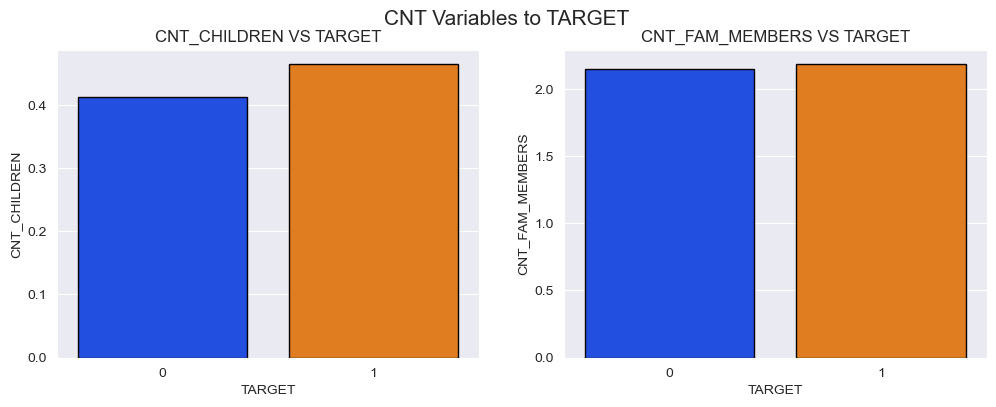

In [95]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,4))
# fig.suptitle('AMT Variables to TARGET')
sns.barplot(ax=axes[0], x=df_app["TARGET"],y=df_app["CNT_CHILDREN"],ci=None, edgecolor="black", palette="bright")
axes[0].set_title("CNT_CHILDREN VS TARGET")

sns.barplot(ax=axes[1], x=df_app["TARGET"],y=df_app["CNT_FAM_MEMBERS"],ci=None, edgecolor="black", palette="bright")
axes[1].set_title("CNT_FAM_MEMBERS VS TARGET")
plt.suptitle("CNT Variables to TARGET", size=15)
plt.show()

##### 1.5) **DAYS** Variables

* **DAYS_BIRTH**: Client's age in days at the time of application
* **DAYS_EMPLOYED**: How many days before the application the person started current employment
* **DAYS_ID_PUBLISH**: How many days before the application did client change the identity document with which he applied for the loan
* **DAYS_LAST_PHONE_CHANGE**: How many days before application did client change phone
* **DAYS_REGISTRATION**: How many days before the application did client change his registration

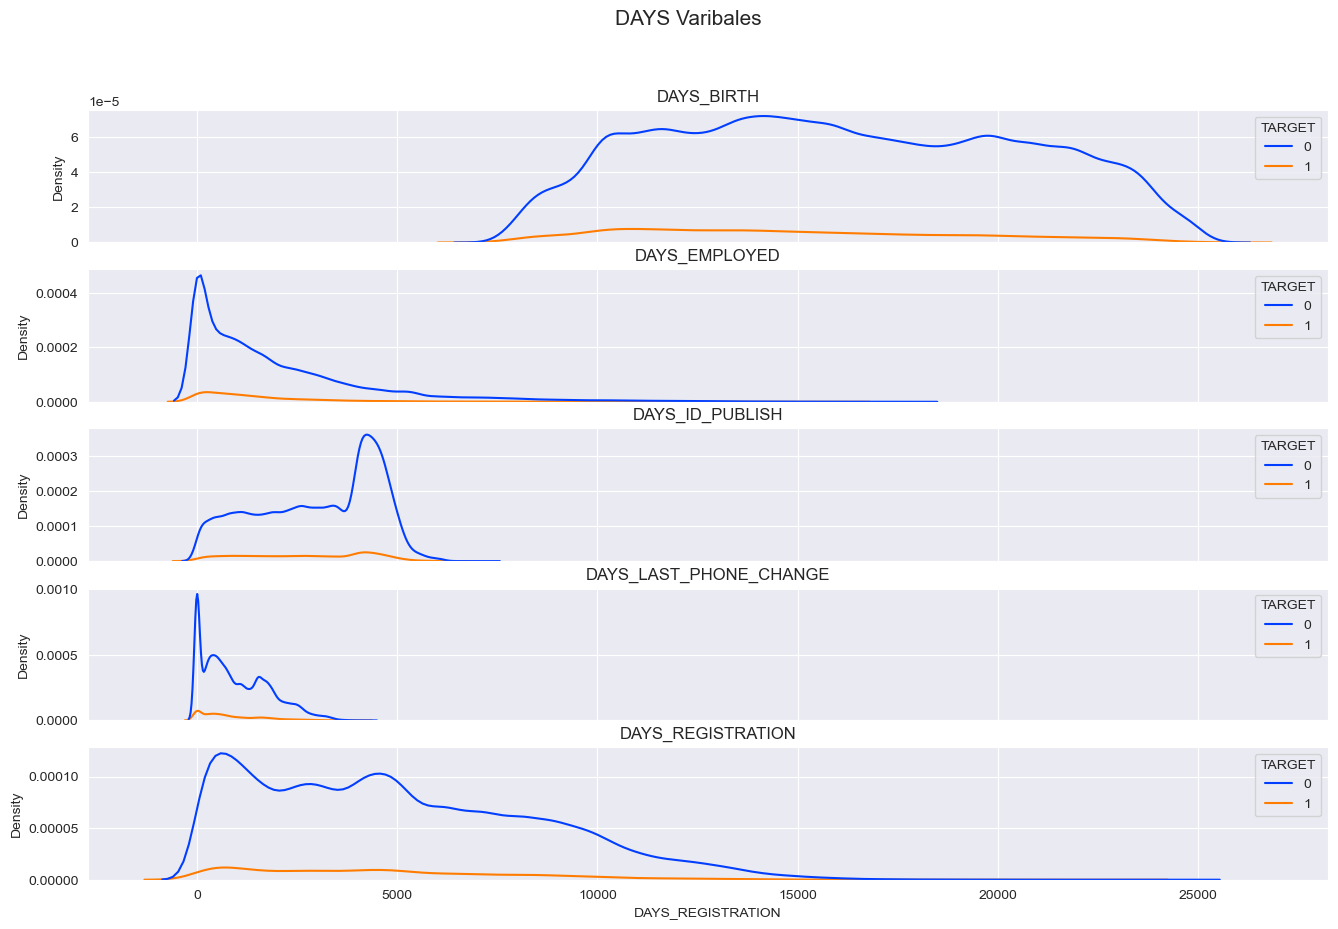

In [96]:
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(16,10))
# fig.suptitle('AMT Variables to TARGET')
sns.kdeplot(ax=axes[0], hue=df_app["TARGET"],x=df_app["DAYS_BIRTH"], palette="bright")
axes[0].set_title("DAYS_BIRTH")

sns.kdeplot(ax=axes[1], hue=df_app["TARGET"],x=df_app["DAYS_EMPLOYED"], palette="bright")
axes[1].set_title("DAYS_EMPLOYED")

sns.kdeplot(ax=axes[2], hue=df_app["TARGET"],x=df_app["DAYS_ID_PUBLISH"], palette="bright")
axes[2].set_title("DAYS_ID_PUBLISH")

sns.kdeplot(ax=axes[3], hue=df_app["TARGET"],x=df_app["DAYS_LAST_PHONE_CHANGE"], palette="bright")
axes[3].set_title("DAYS_LAST_PHONE_CHANGE")

sns.kdeplot(ax=axes[4], hue=df_app["TARGET"],x=df_app["DAYS_REGISTRATION"], palette="bright")
axes[4].set_title("DAYS_REGISTRATION")

plt.suptitle("DAYS Varibales", size=15)
plt.show()

##### 1.6) **DEF/OBS** Variables

* **DEF_30_CNT_SOCIAL_CIRCLE**: How many observation of client's social surroundings defaulted on 30 DPD (days past due)
* **OBS_30_CNT_SOCIAL_CIRCLE**: How many observation of client's social surroundings with observable 30 DPD (days past due) default
* **DEF_60_CNT_SOCIAL_CIRCLE**: How many observation of client's social surroundings with observable 60 DPD (days past due) default
* **OBS_60_CNT_SOCIAL_CIRCLE**: How many observation of client's social surroundings defaulted on 60 (days past due) DPD

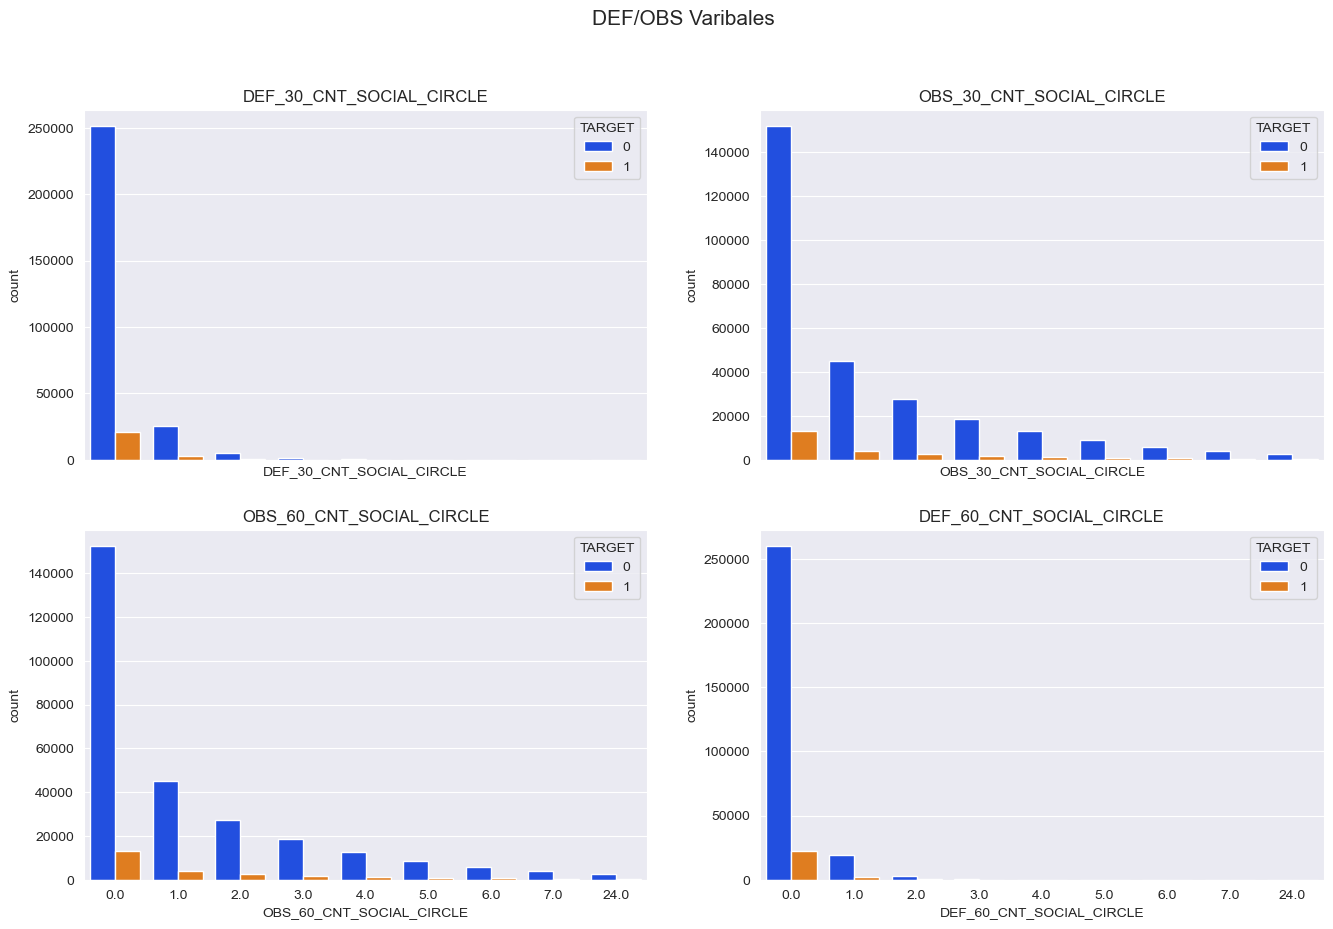

In [97]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,10))
sns.countplot(ax=axes[0,0], hue=df_app["TARGET"],x=df_app["DEF_30_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[0,0].set_title("DEF_30_CNT_SOCIAL_CIRCLE")

sns.countplot(ax=axes[0,1], hue=df_app["TARGET"],x=df_app["OBS_30_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[0,1].set_title("OBS_30_CNT_SOCIAL_CIRCLE")

sns.countplot(ax=axes[1,0], hue=df_app["TARGET"],x=df_app["OBS_60_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[1,0].set_title("OBS_60_CNT_SOCIAL_CIRCLE")

sns.countplot(ax=axes[1,1], hue=df_app["TARGET"],x=df_app["DEF_60_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[1,1].set_title("DEF_60_CNT_SOCIAL_CIRCLE")

plt.suptitle("DEF/OBS Varibales", size=15)
plt.show()

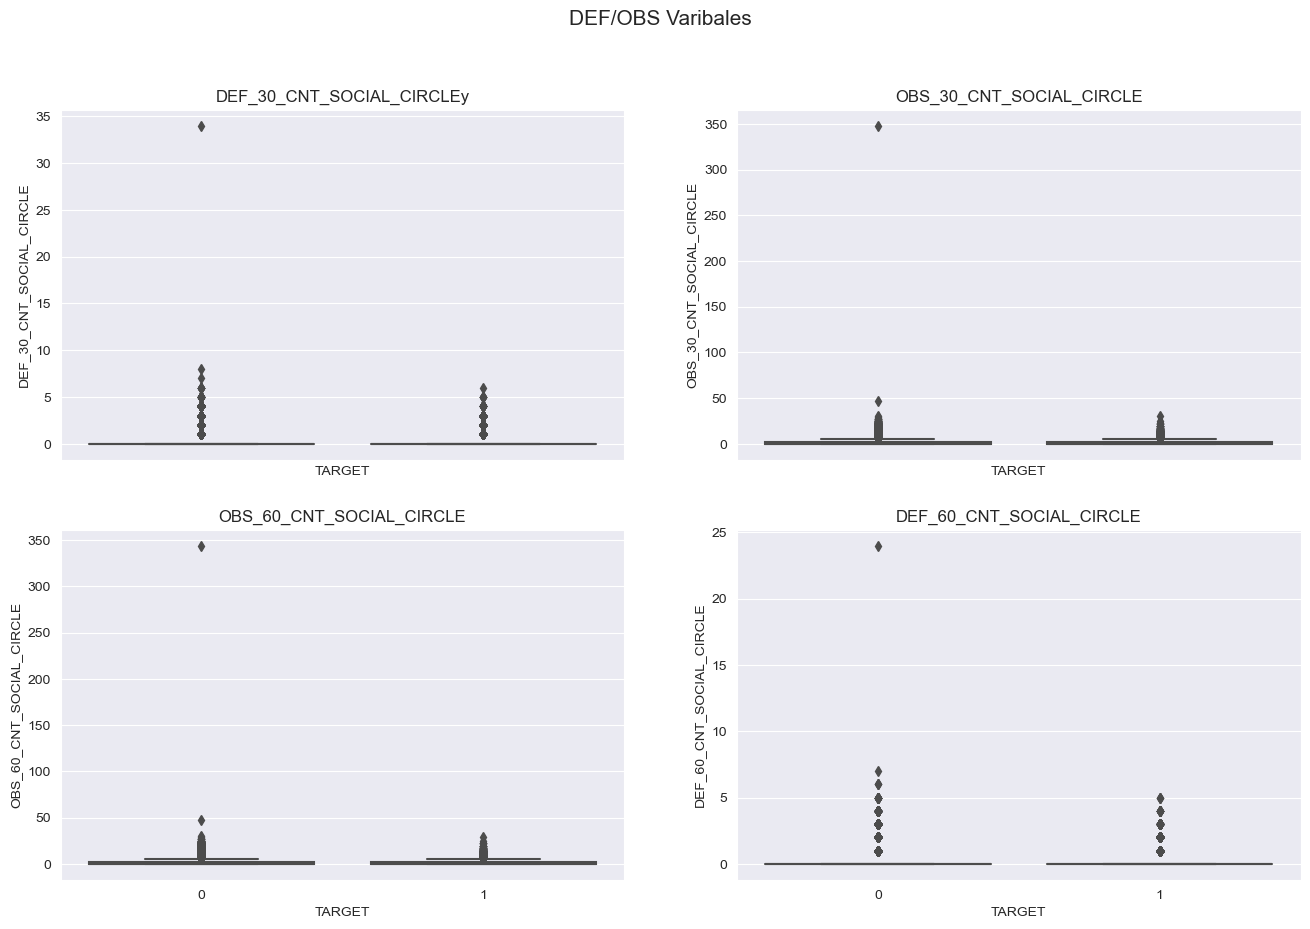

In [98]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,10))
# fig.suptitle('AMT Variables to TARGET')
sns.boxplot(ax=axes[0,0],x=df_app["TARGET"],y=df_app["DEF_30_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[0,0].set_title("DEF_30_CNT_SOCIAL_CIRCLEy")

sns.boxplot(ax=axes[0,1], x=df_app["TARGET"],y=df_app["OBS_30_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[0,1].set_title("OBS_30_CNT_SOCIAL_CIRCLE")

sns.boxplot(ax=axes[1,0], x=df_app["TARGET"],y=df_app["OBS_60_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[1,0].set_title("OBS_60_CNT_SOCIAL_CIRCLE")

sns.boxplot(ax=axes[1,1], x=df_app["TARGET"],y=df_app["DEF_60_CNT_SOCIAL_CIRCLE"], palette="bright")
axes[1,1].set_title("DEF_60_CNT_SOCIAL_CIRCLE")

plt.suptitle("DEF/OBS Varibales", size=15)
plt.show()

##### 1.7) **FLAG** Variables

* **FLAG_CONT_MOBILE**: Was mobile phone reachable (1=YES, 0=NO)
* **FLAG_EMAIL**: Did client provide email (1=YES, 0=NO)
* **FLAG_EMP_PHONE**: Did client provide work phone (1=YES, 0=NO)
* **FLAG_MOBIL**: Did client provide mobile phone (1=YES, 0=NO)
* **FLAG_OWN_CAR**: Flag if the client owns a car
* **FLAG_OWN_REALTY**: Flag if client owns a house or flat
* **FLAG_PHONE**: Did client provide home phone (1=YES, 0=NO)
* **FLAG_WORK_PHONE**: Did client provide home phone (1=YES, 0=NO)

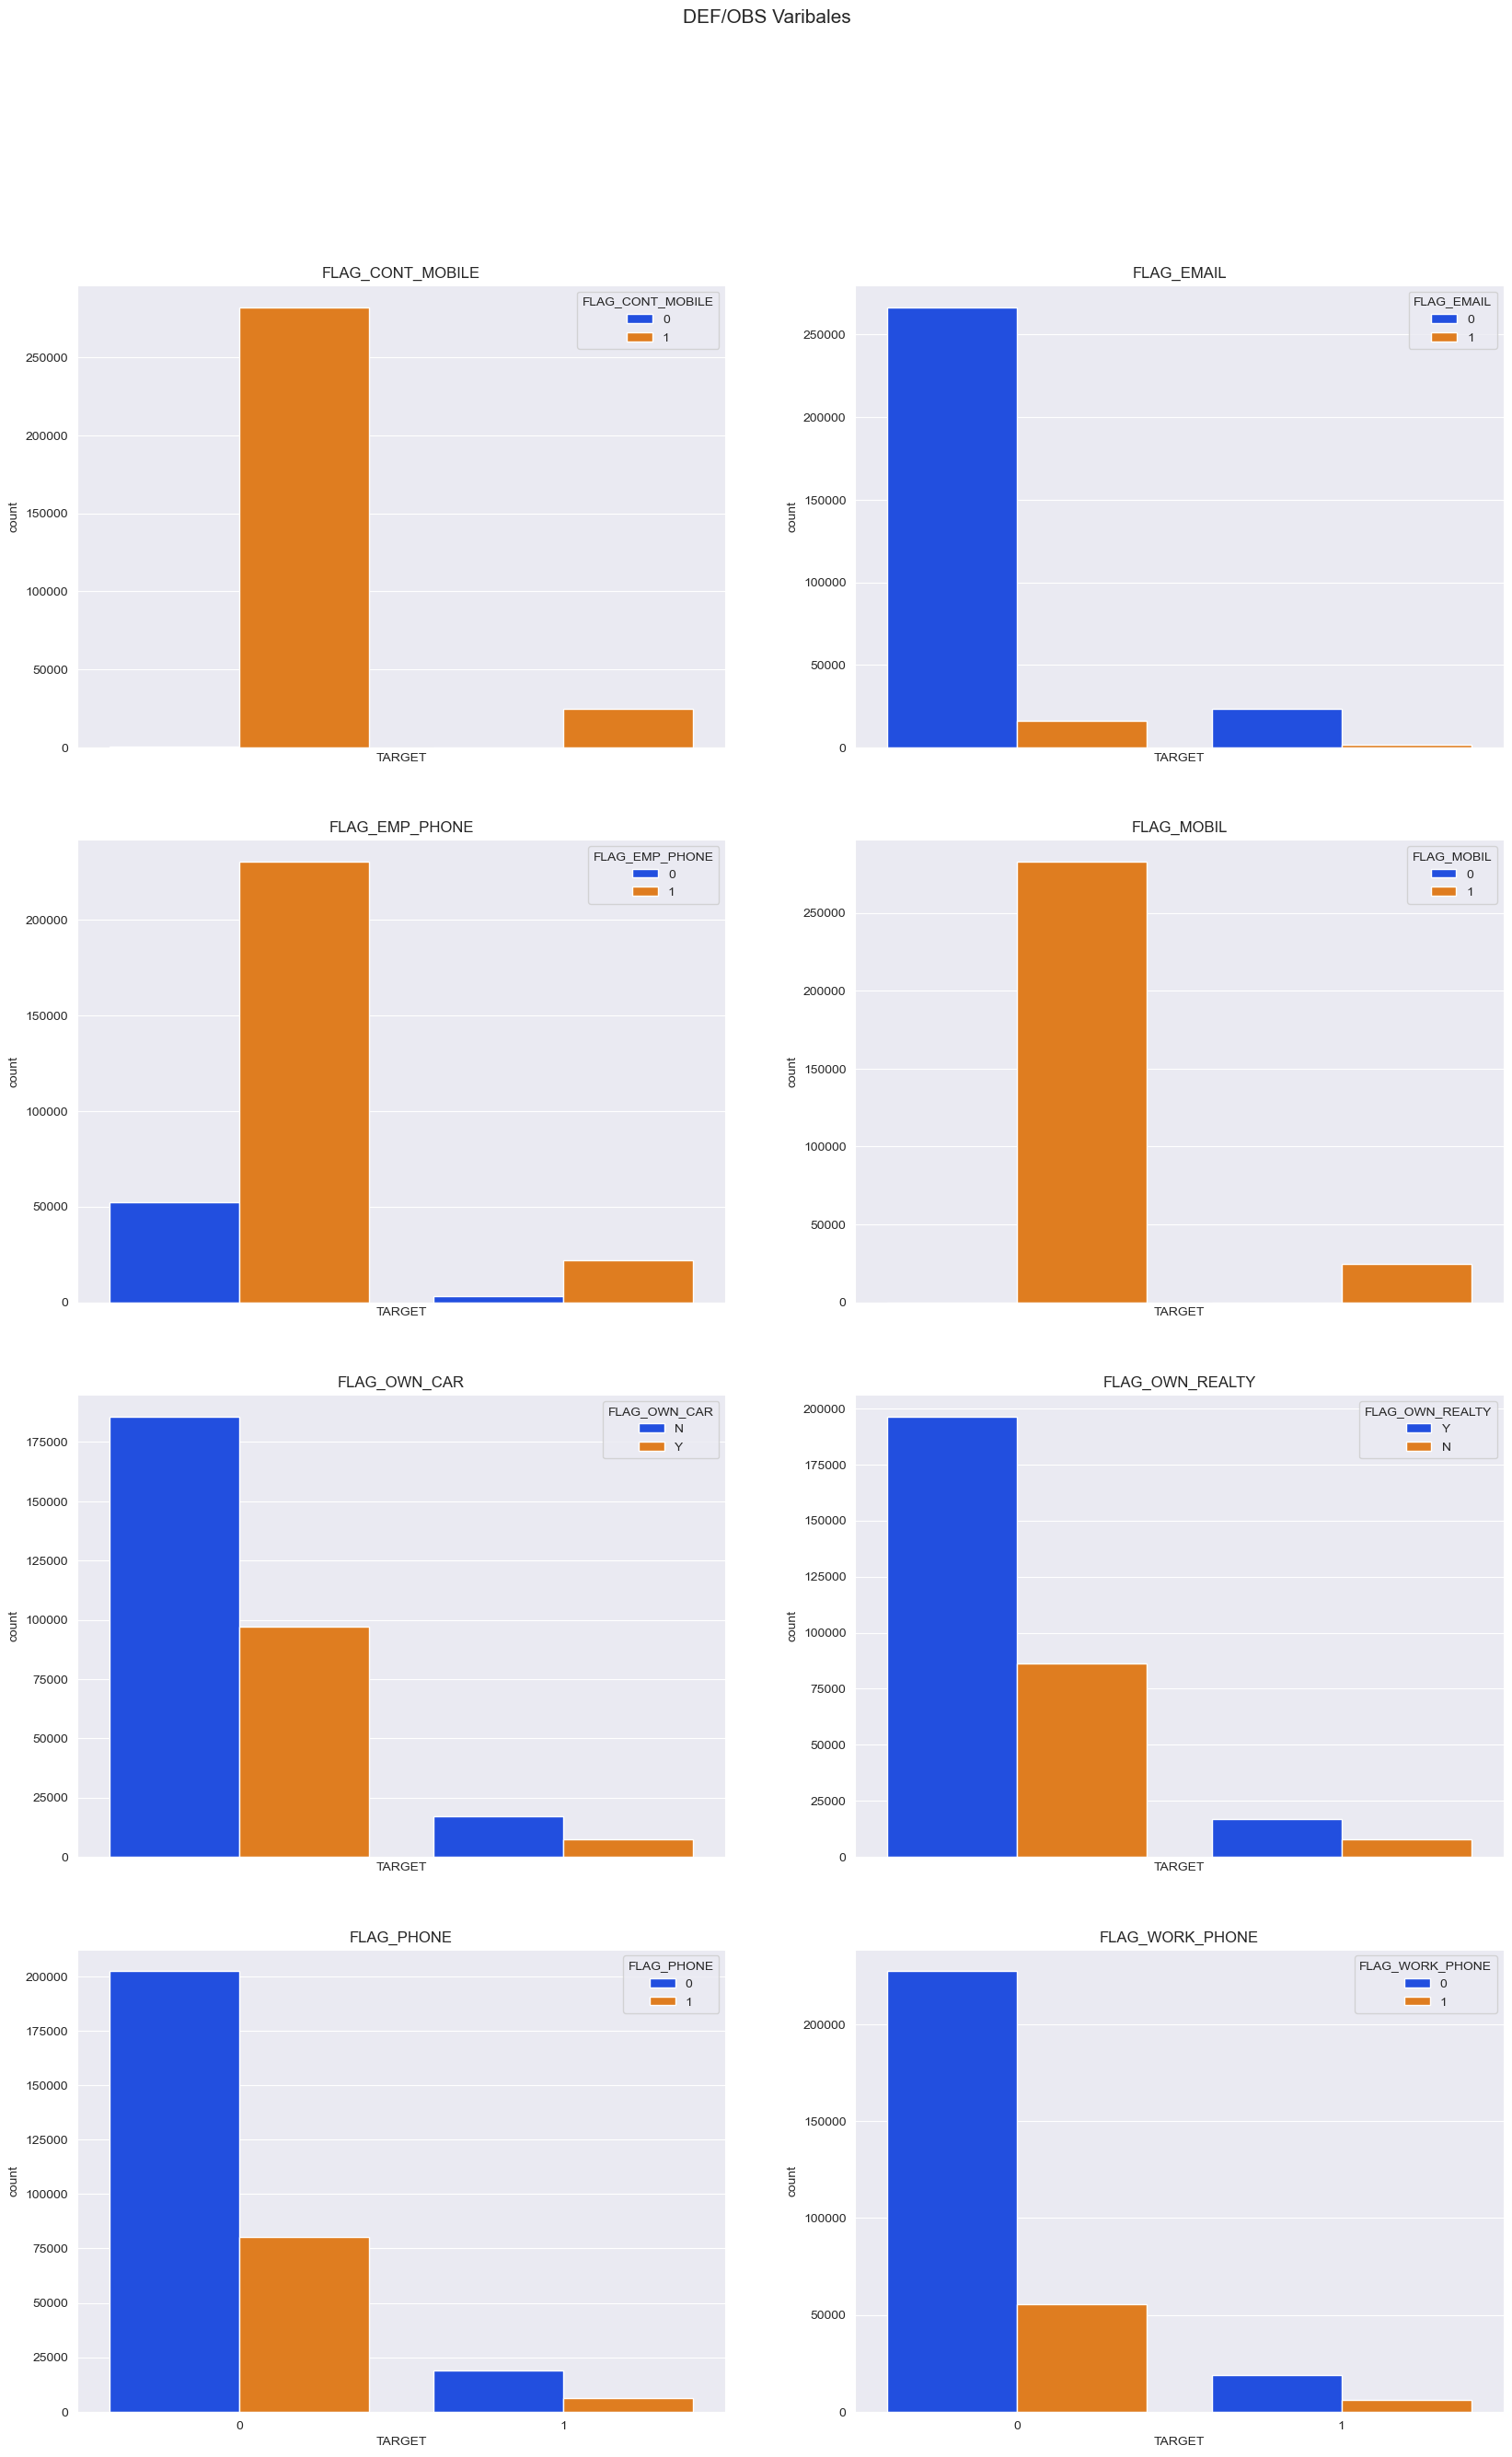

In [99]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(20,30))
sns.countplot(ax=axes[0,0],x=df_app["TARGET"],hue=df_app["FLAG_CONT_MOBILE"], palette="bright")
axes[0,0].set_title("FLAG_CONT_MOBILE")

sns.countplot(ax=axes[0,1], x=df_app["TARGET"],hue=df_app["FLAG_EMAIL"], palette="bright")
axes[0,1].set_title("FLAG_EMAIL")

sns.countplot(ax=axes[1,0], x=df_app["TARGET"],hue=df_app["FLAG_EMP_PHONE"], palette="bright")
axes[1,0].set_title("FLAG_EMP_PHONE")

sns.countplot(ax=axes[1,1], x=df_app["TARGET"],hue=df_app["FLAG_MOBIL"], palette="bright")
axes[1,1].set_title("FLAG_MOBIL")

sns.countplot(ax=axes[2,0], x=df_app["TARGET"],hue=df_app["FLAG_OWN_CAR"], palette="bright")
axes[2,0].set_title("FLAG_OWN_CAR")

sns.countplot(ax=axes[2,1], x=df_app["TARGET"],hue=df_app["FLAG_OWN_REALTY"], palette="bright")
axes[2,1].set_title("FLAG_OWN_REALTY")

sns.countplot(ax=axes[3,0], x=df_app["TARGET"],hue=df_app["FLAG_PHONE"], palette="bright")
axes[3,0].set_title("FLAG_PHONE")

sns.countplot(ax=axes[3,1], x=df_app["TARGET"],hue=df_app["FLAG_WORK_PHONE"], palette="bright")
axes[3,1].set_title("FLAG_WORK_PHONE")

plt.suptitle("DEF/OBS Varibales", size=15)
plt.show()

##### 1.8) **FLAG_DOCUMENT** Variables

* **FLAG_DOCUMENT_X**: did client provide document X

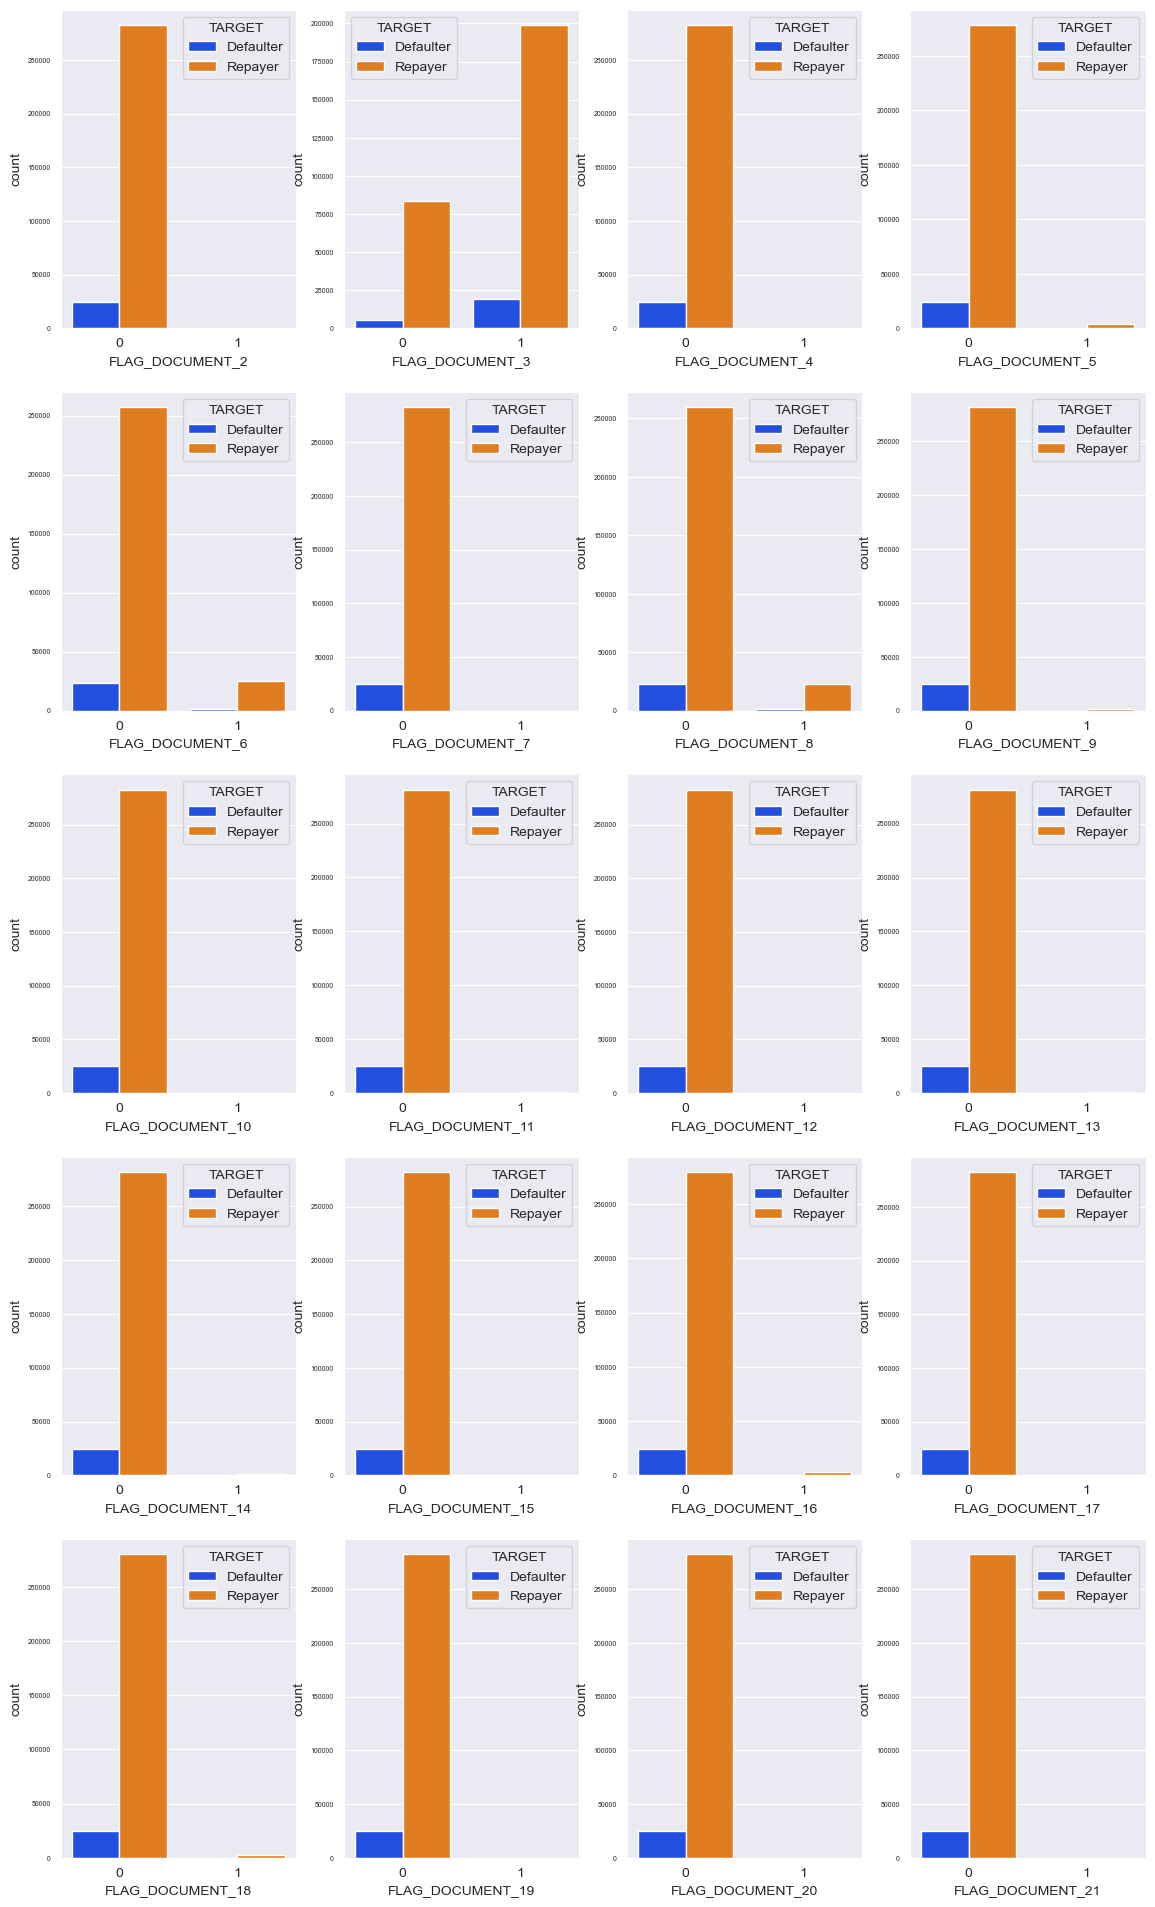

In [100]:
flagdoc_cols= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
               'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
               'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
               'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
               'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
               'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = df_app[flagdoc_cols+["TARGET"]].copy()

length = len(flagdoc_cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(14,24))
for i,j in itertools.zip_longest(flagdoc_cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(x=df_flag[i],hue=df_flag["TARGET"], palette="bright")
    plt.yticks(fontsize=5)

* Seems only valuable variable here is **FLAG_DOCUMENT_3**: other do not have any explanatory power so dropping them would be right choice.

##### 1.9) **HOUR_APPR_PROCESS_START**/**WEEKDAY_APPR_PROCESS_START**

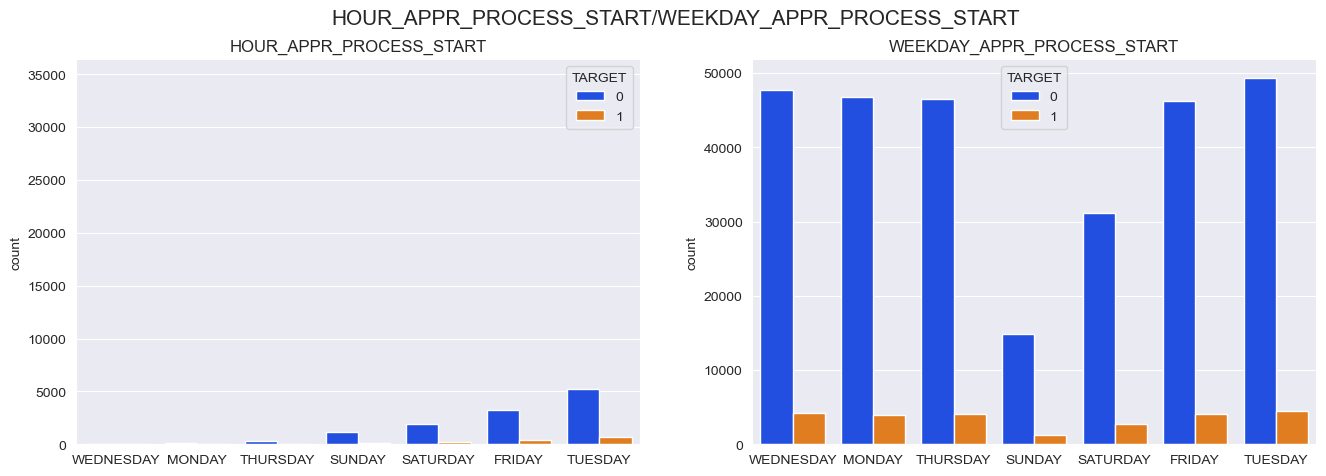

In [101]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,5))

sns.countplot(ax=axes[0], hue=df_app["TARGET"],x=df_app["HOUR_APPR_PROCESS_START"], palette="bright")
axes[0].set_title("HOUR_APPR_PROCESS_START")
axes[0].set_xlabel("")

sns.countplot(ax=axes[1], hue=df_app["TARGET"],x=df_app["WEEKDAY_APPR_PROCESS_START"], palette="bright")
axes[1].set_title("WEEKDAY_APPR_PROCESS_START")
axes[1].set_xlabel("")

plt.suptitle("HOUR_APPR_PROCESS_START/WEEKDAY_APPR_PROCESS_START", size=15)
plt.show()

##### 1.10) NAME Variables

* **NAME_CONTRACT_TYPE**: Identification if loan is cash or revolving
* **NAME_EDUCATION_TYPE**: Level of highest education the client achieved
* **NAME_FAMILY_STATUS**: Family status of the client
* **NAME_HOUSING_TYPE**: What is the housing situation of the client (renting, living with parents, ...)
* **NAME_INCOME_TYPE**: Clients income type (businessman, working, maternity leave,…)
* **NAME_TYPE_SUITE**: Who was accompanying client when he was applying for the loan

* Firtly lets see distribution of loan: whether it is **cash** or **revolving**

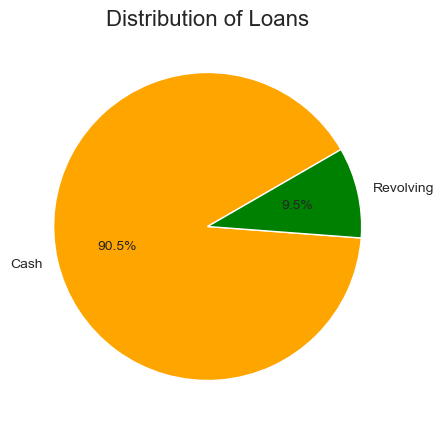

In [103]:
plt.figure(figsize=(5,5))
plt.pie(df_app['NAME_CONTRACT_TYPE'].value_counts().tolist(), labels=['Cash', 'Revolving'],
        colors=['orange', 'green'], autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Loans', size=16)
plt.show()

* Now let's check whether default rate differes via NAME features

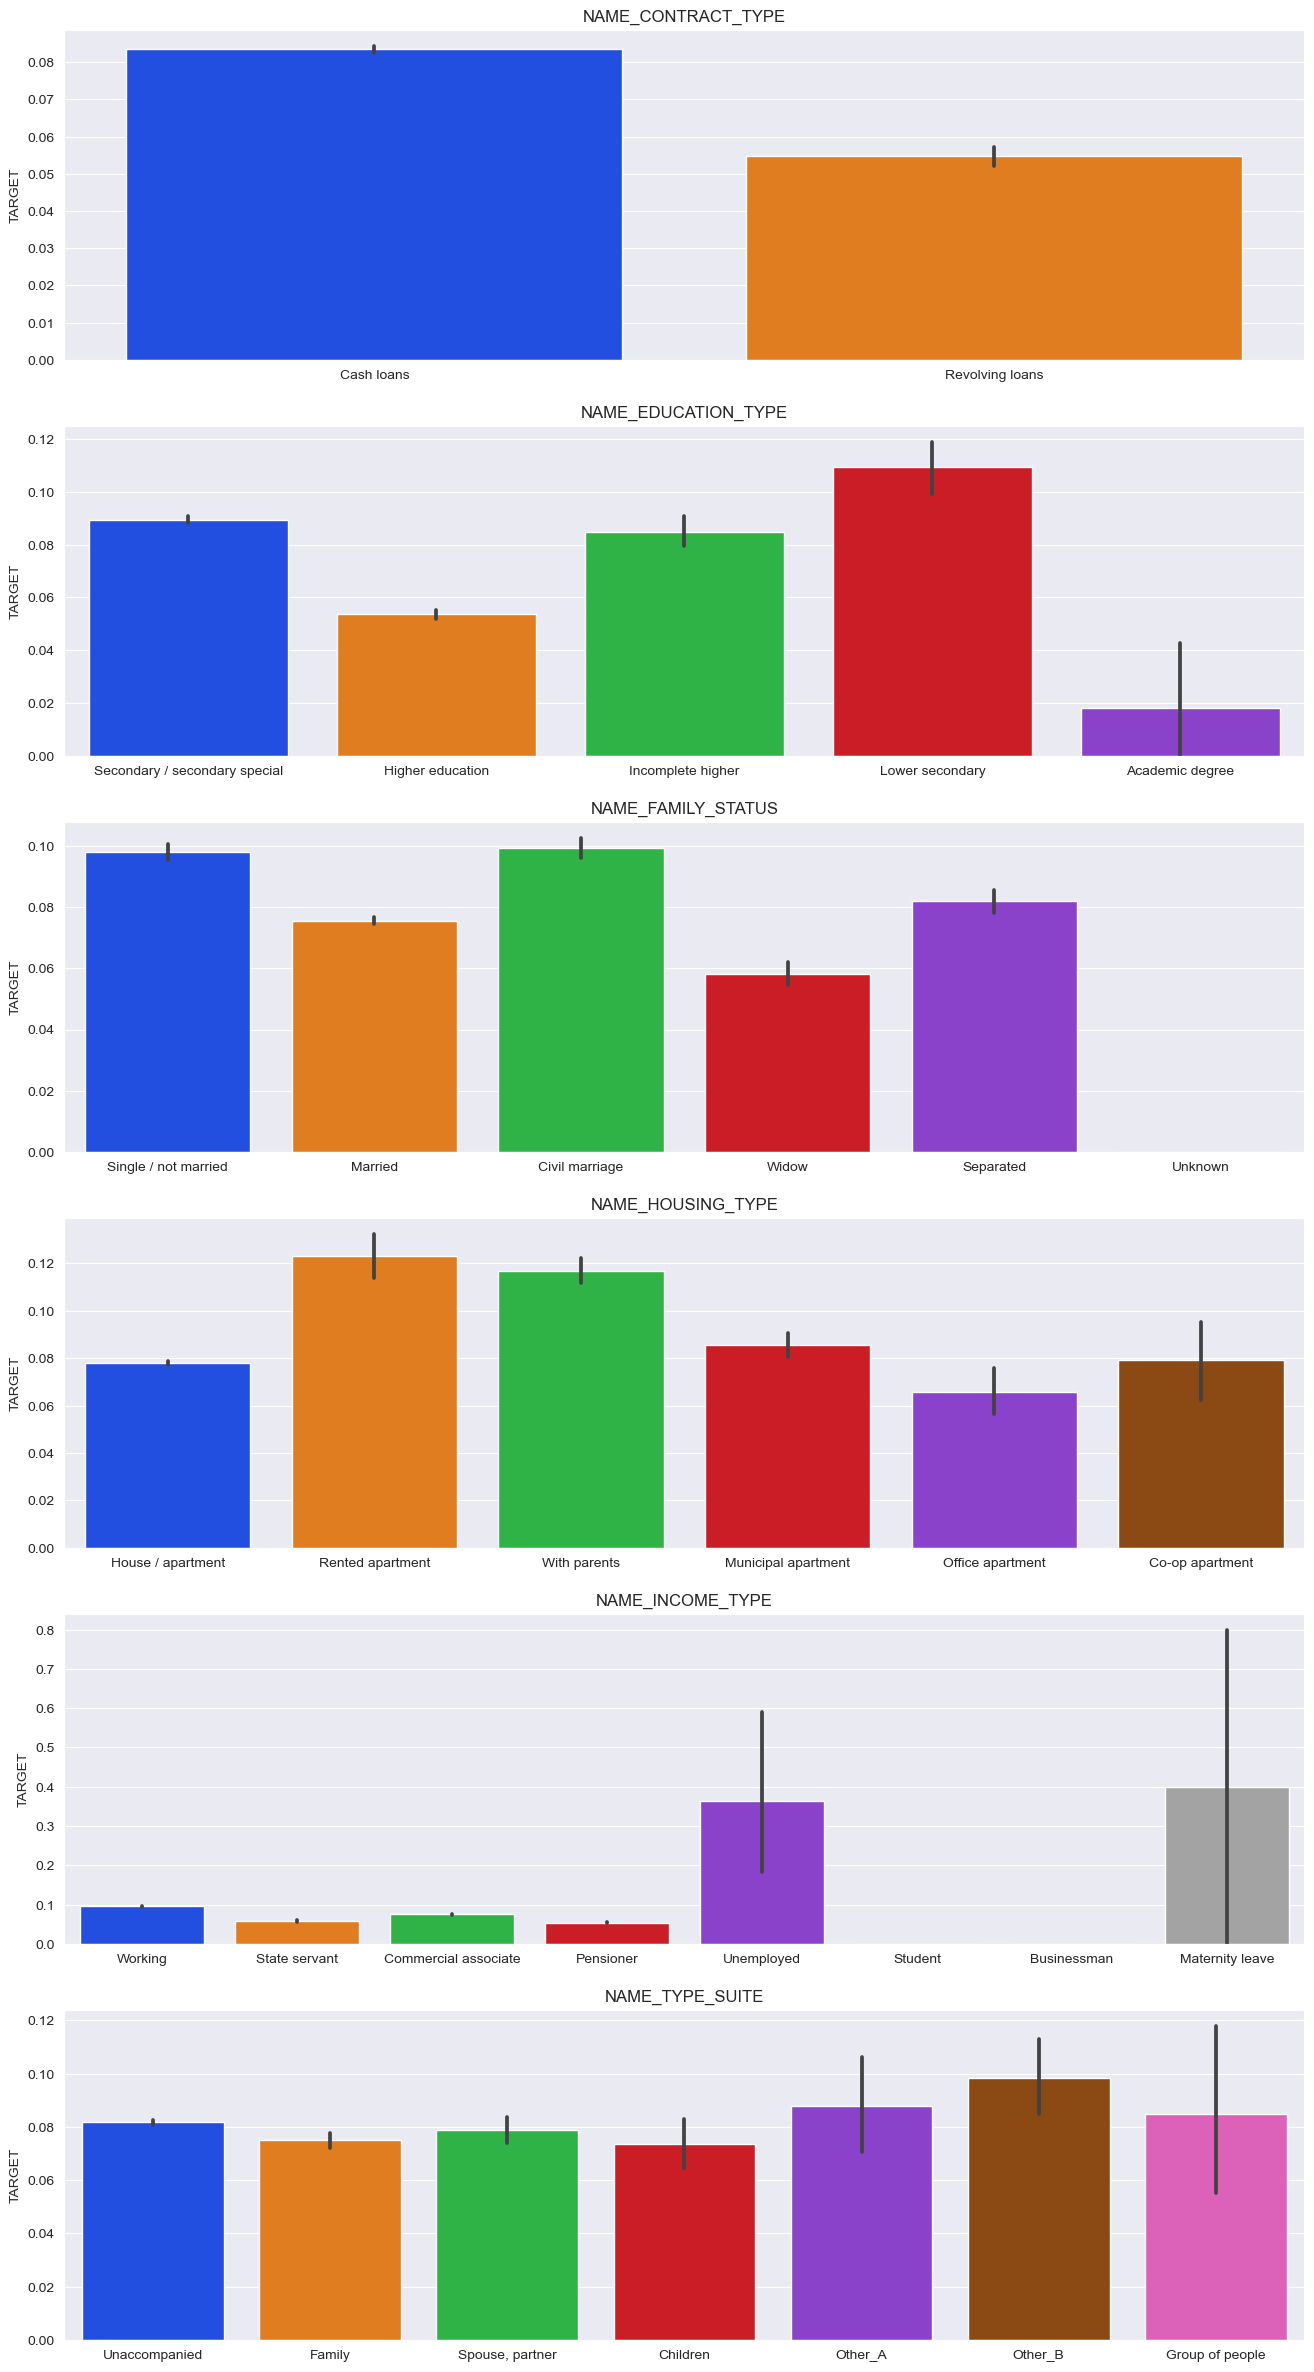

In [104]:
name_cols= ['NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
               'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE']

df_name_cols = df_app[name_cols+["TARGET"]].copy()

length = len(name_cols)

fig = plt.figure(figsize=(16,30))
for i,j in itertools.zip_longest(name_cols,range(length)):
    plt.subplot(6,1,j+1)
    ax = sns.barplot(x=df_name_cols[i],y=df_name_cols["TARGET"], palette="bright")
    plt.yticks(fontsize=10)
    plt.xlabel("")
    plt.title(i)

These barplots show average payment problem's with differenct classes. These graph shows following findings:
* There are more peyment problems with cash loans rather than revolving loans;
* People with higher education are less likely to have problems with payment;
* Consumers who live with parent or rented appartment are more likely to have payment problems;
* Unemloyeed and Maternity leave consumers are very likely to have problems with payment;
* Class of accompanying person does not affect payment problems much: variation increases as  we move more informal accompanying person class but average do not differ much.

##### 1.11) **OCCUPATION_TYPE**/**ORGANIZATION_TYPE**
* **OCCUPATION_TYPE**: What kind of occupation does the client have
* **ORGANIZATION_TYPE**: Type of organization where client works	

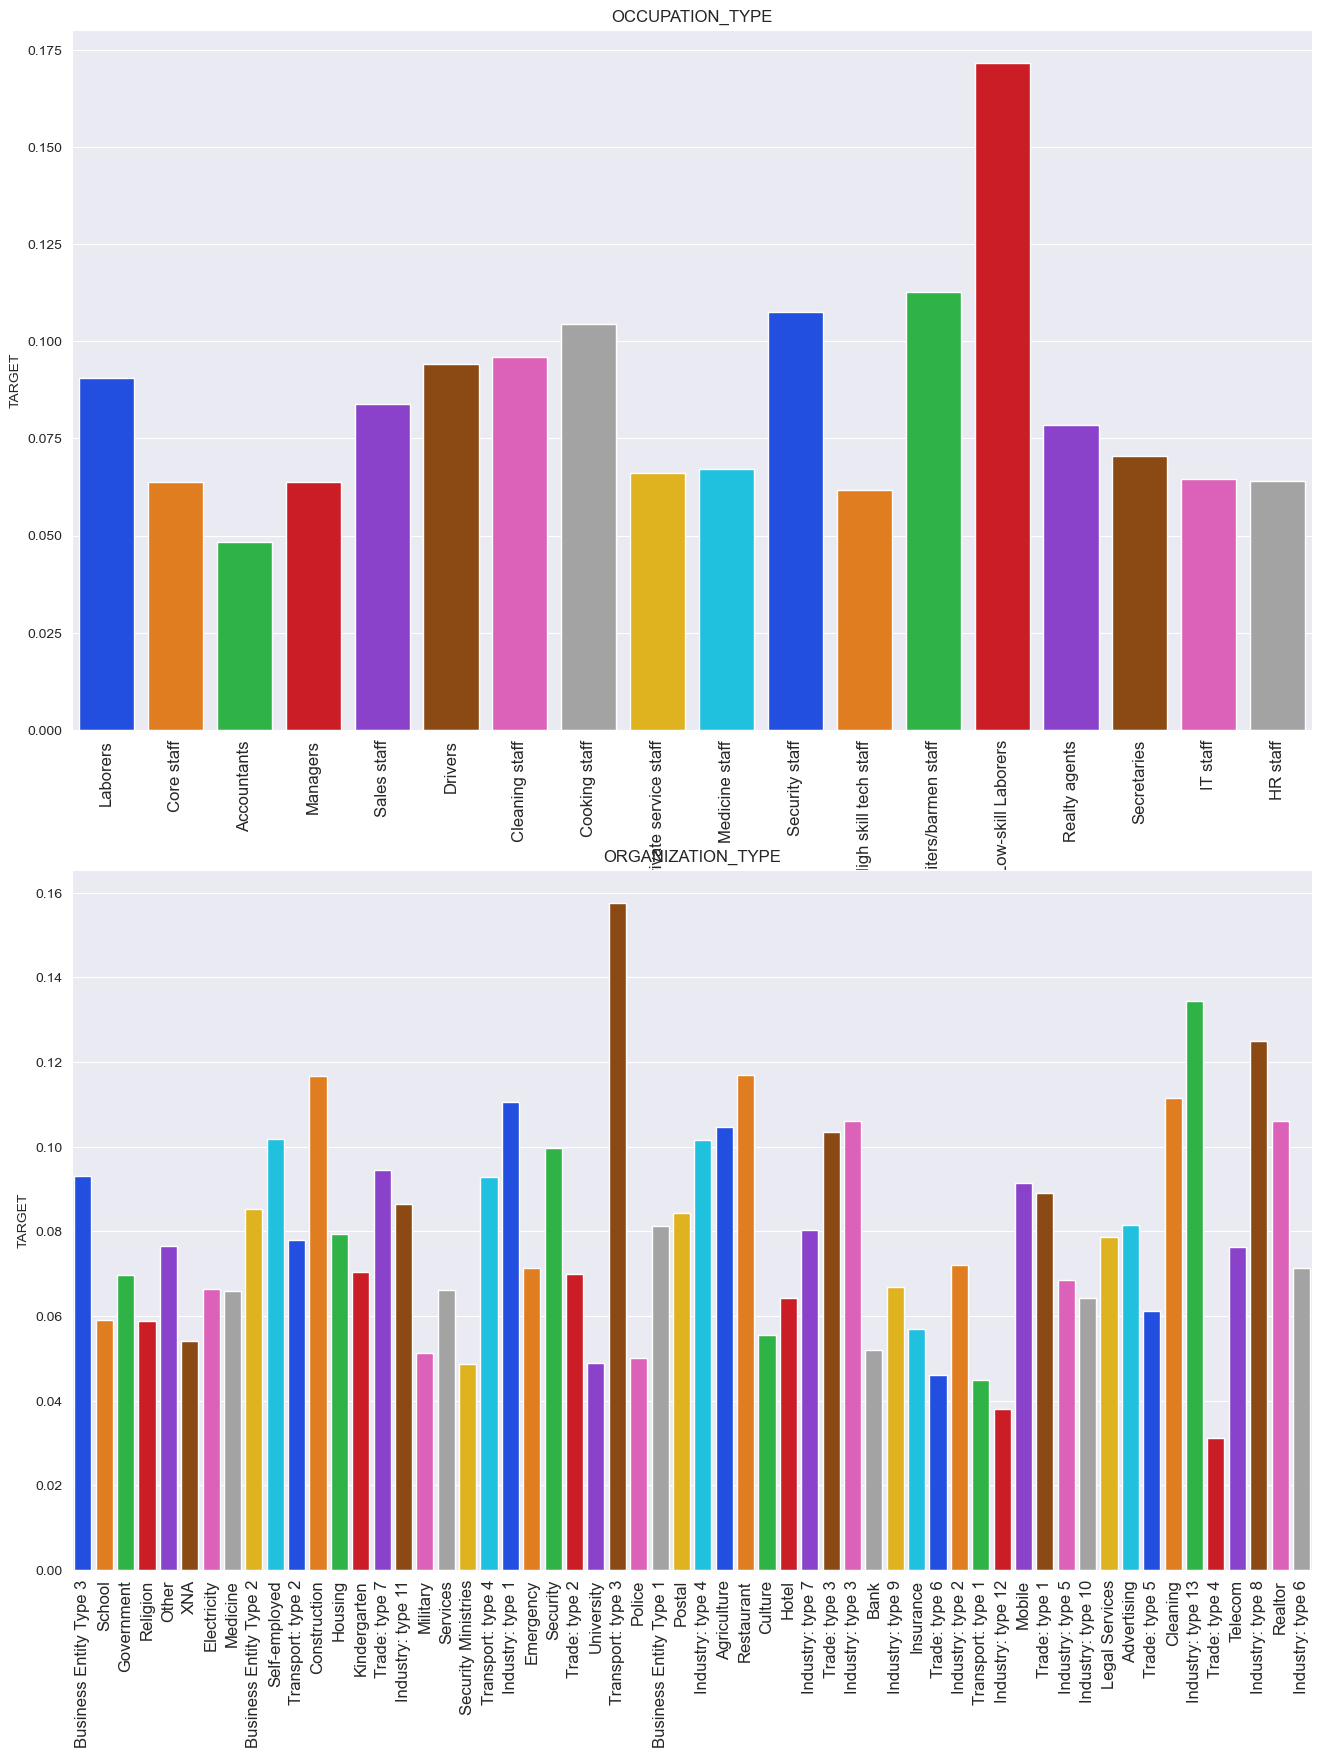

In [105]:
type_cols= ["OCCUPATION_TYPE", 'ORGANIZATION_TYPE']

df_type_cols = df_app[type_cols+["TARGET"]].copy()

length = len(type_cols)

fig = plt.figure(figsize=(16,20))
for i,j in itertools.zip_longest(type_cols,range(length)):
    plt.subplot(2,1,j+1)
    ax = sns.barplot(x=df_type_cols[i],y=df_type_cols["TARGET"], palette="bright", ci=False)
    plt.yticks(fontsize=10)
    plt.xticks(rotation='vertical', size=12)
    plt.xlabel("")
    plt.title(i)

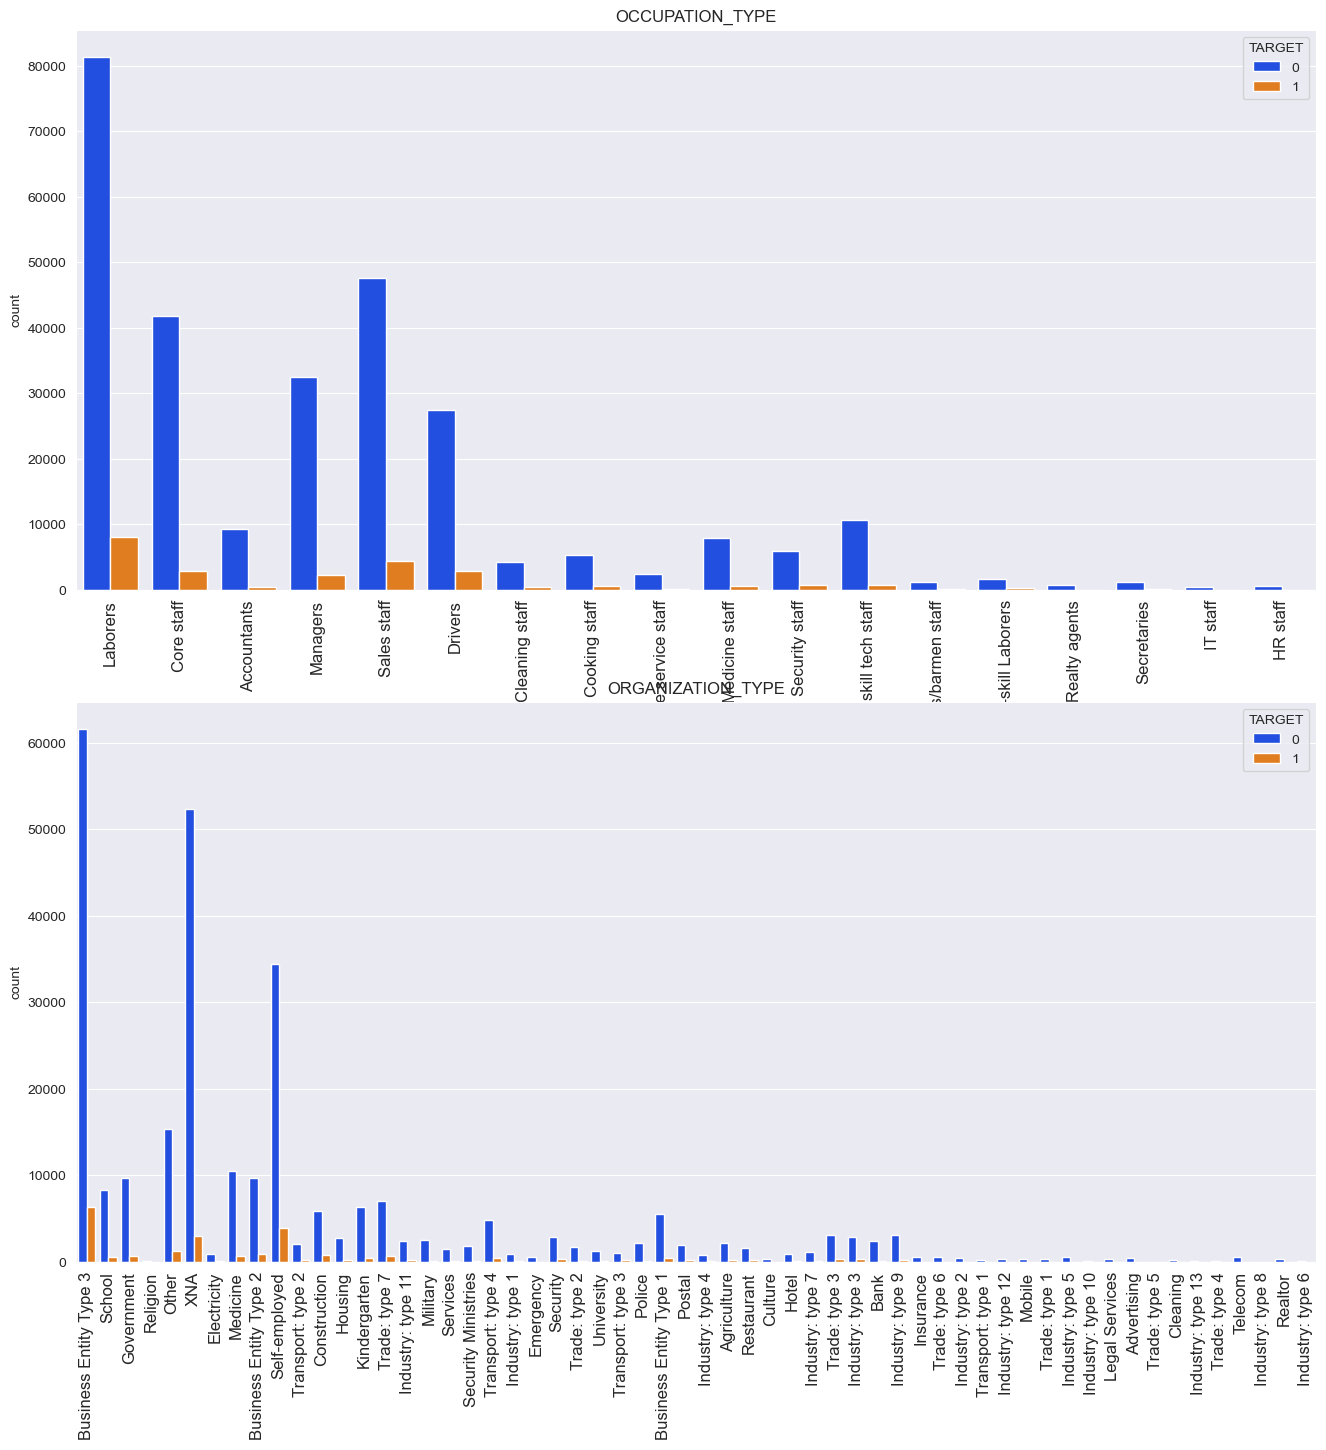

In [106]:
type_cols= ["OCCUPATION_TYPE", 'ORGANIZATION_TYPE']

df_type_cols = df_app[type_cols+["TARGET"]].copy()

length = len(type_cols)

fig = plt.figure(figsize=(16,16))
for i,j in itertools.zip_longest(type_cols,range(length)):
    plt.subplot(2,1,j+1)
    ax = sns.countplot(x=df_type_cols[i],hue=df_type_cols["TARGET"], palette="bright")
    plt.yticks(fontsize=10)
    plt.xticks(rotation='vertical', size=12)
    plt.xlabel("")
    plt.title(i)

##### 1.12) REG Variables
* **REGION_POPULATION_RELATIVE**: Normalized population of region where client lives (higher number means the client lives in more populated region);
* **REGION_RATING_CLIENT**: Our rating of the region where client lives (1,2,3);
* **REGION_RATING_CLIENT_W_CITY**: Our rating of the region where client lives with taking city into account (1,2,3);
* **REG_CITY_NOT_LIVE_CITY**: Flag if client's permanent address does not match contact address (1=different, 0=same, at city level);
* **REG_CITY_NOT_WORK_CITY**: Flag if client's permanent address does not match work address (1=different, 0=same, at city level);
* **REG_REGION_NOT_LIVE_REGION**: Flag if client's permanent address does not match contact address (1=different, 0=same, at region level);
* **REG_REGION_NOT_WORK_REGION**: Flag if client's permanent address does not match work address (1=different, 0=same, at region level).

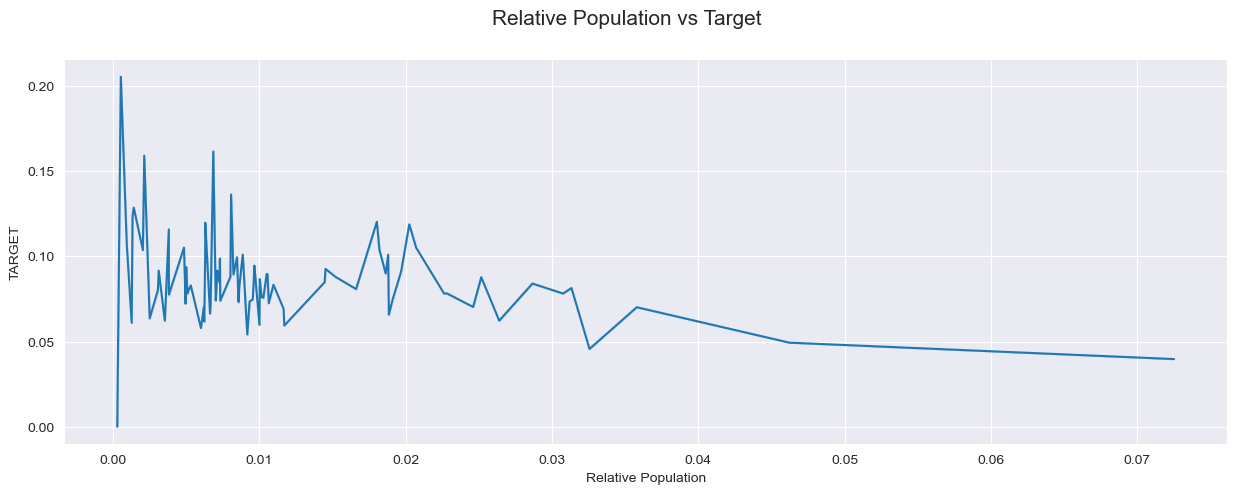

In [107]:
plt.figure(figsize=(15,5))
sns.lineplot(y=df_app["TARGET"],x=df_app["REGION_POPULATION_RELATIVE"], palette="bright", ci=False)

plt.suptitle("Relative Population vs Target", size=15)
plt.xlabel("Relative Population")
plt.show()

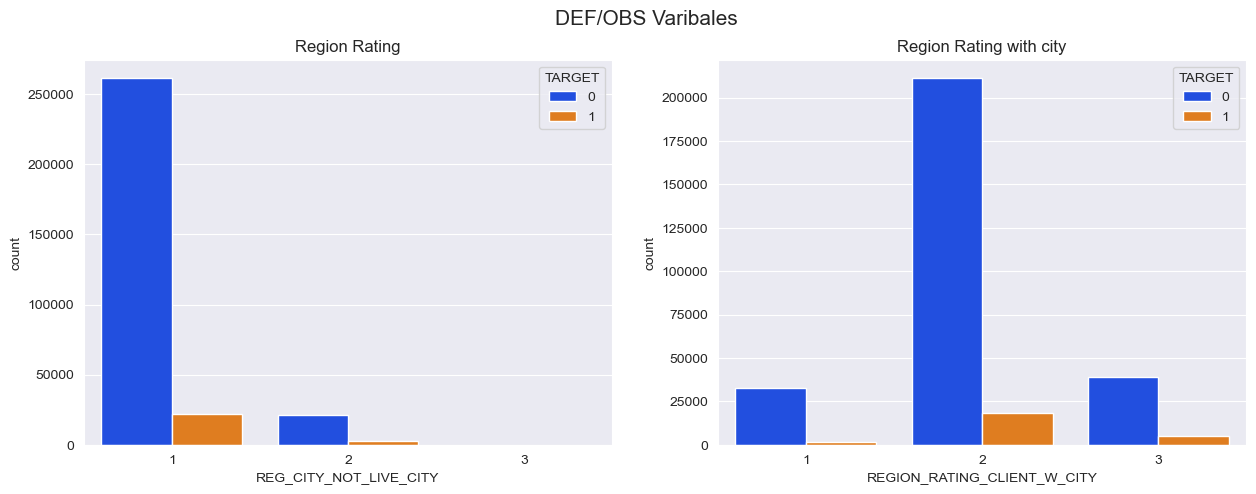

In [108]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.countplot(ax=axes[0],hue=df_app["TARGET"],x=df_app["REG_CITY_NOT_LIVE_CITY"], palette="bright")
axes[0].set_title("Region Rating")

sns.countplot(ax=axes[1], hue=df_app["TARGET"],x=df_app["REGION_RATING_CLIENT_W_CITY"], palette="bright")
axes[1].set_title("Region Rating with city")

plt.suptitle("DEF/OBS Varibales", size=15)
plt.show()

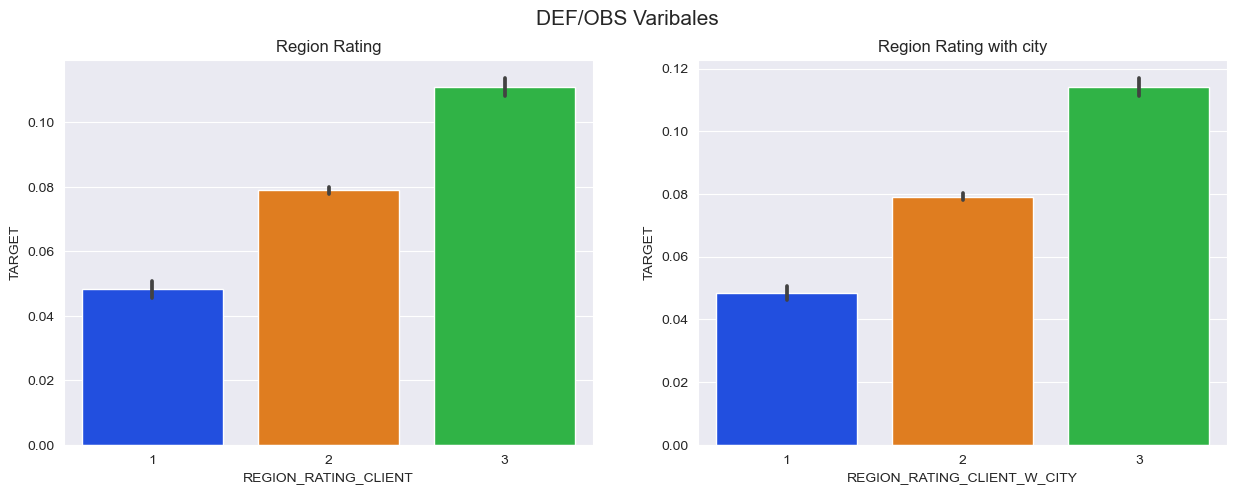

In [109]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.barplot(ax=axes[0],y=df_app["TARGET"],x=df_app["REGION_RATING_CLIENT"], palette="bright")
axes[0].set_title("Region Rating")

sns.barplot(ax=axes[1], y=df_app["TARGET"],x=df_app["REGION_RATING_CLIENT_W_CITY"], palette="bright")
axes[1].set_title("Region Rating with city")

plt.suptitle("DEF/OBS Varibales", size=15)
plt.show()

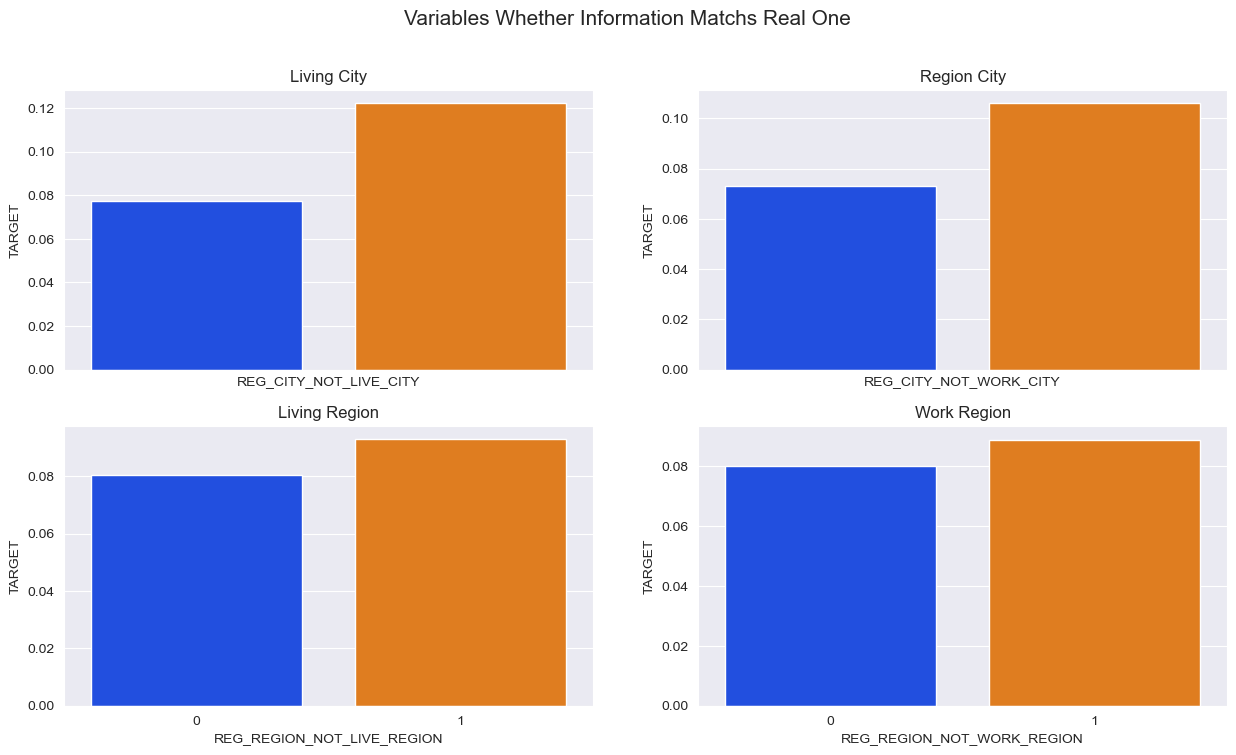

In [110]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,8))
sns.barplot(ax=axes[0,0],y=df_app["TARGET"],x=df_app["REG_CITY_NOT_LIVE_CITY"], palette="bright",ci=False)
axes[0,0].set_title("Living City")

sns.barplot(ax=axes[0,1], y=df_app["TARGET"],x=df_app["REG_CITY_NOT_WORK_CITY"], palette="bright",ci=False)
axes[0,1].set_title("Region City")

sns.barplot(ax=axes[1,0],y=df_app["TARGET"],x=df_app["REG_REGION_NOT_LIVE_REGION"], palette="bright",ci=False)
axes[1,0].set_title("Living Region")

sns.barplot(ax=axes[1,1], y=df_app["TARGET"],x=df_app["REG_REGION_NOT_WORK_REGION"], palette="bright",ci=False)
axes[1,1].set_title("Work Region")

plt.suptitle("Variables Whether Information Matchs Real One", size=15)
plt.show()

* As excpected, client's whose provided information does not match permament ones are more likely to have problems with payments

## Data Preprocessing

##### 1) Delete **FLAG_DOCUMENT_X** variables except **FLAG_DOCUMENT_3**

In [111]:
df_app.drop(columns=["FLAG_DOCUMENT_2", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
                    "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
                    "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14",
                    "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18",
                    "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], inplace=True)

##### 2) Generate Dummy Variables for Categorical Features
* As I plan to use non-linear models for prediction (Boosting Decision Trees), There is no need to generate N-1 dummy variable to avoid so called dummy variable trap, so I'll generate just N dummy variable for N class.

In [112]:
df_dummy = pd.get_dummies(df_app[categorical_features], drop_first=False)
df_app.drop(columns=categorical_features, inplace=True)

df = pd.concat([df_app, df_dummy], axis=1)
df_app.shape, df_dummy.shape, df.shape

((307511, 36), (307511, 124), (307511, 160))

In [113]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_ANNUITY                  307511 non-null  float64
 1   AMT_CREDIT                   307511 non-null  float64
 2   AMT_GOODS_PRICE              307511 non-null  float64
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   CNT_FAM_MEMBERS              307511 non-null  float64
 6   DAYS_BIRTH                   307511 non-null  int64  
 7   DAYS_EMPLOYED                307511 non-null  int64  
 8   DAYS_ID_PUBLISH              307511 non-null  int64  
 9   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DEF_30_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 12  DEF_60_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 13 

##### 3) Generate X & y Matrices
* I will generate two X & y matrices: one with varibale **EXT_SOURCE_3** for Boosting algorithms and one without it; as there is missing values in it, boosting methodes do not have problems processing it but linear models like logistic regression do not support missing values.

In [114]:
X, y = df.drop(columns="TARGET").values, df["TARGET"].values
print(X.shape, y.shape)
X2, y2 = df.drop(columns=["TARGET", "EXT_SOURCE_3"]).values, df["TARGET"].values
print(X2.shape, y2.shape)

(307511, 159) (307511,)
(307511, 158) (307511,)


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=444)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=444)

In [116]:
scaler = StandardScaler()
X2_train_sc, X2_test_sc = scaler.fit_transform(X2_train), scaler.fit_transform(X2_test)

## Conclusion

In conclusion, this project has underscored the paramount importance of causality in the field of machine learning and data science. Through the exploration of various case studies and methodologies, we have seen how causal inference can significantly enhance the understanding and interpretation of data beyond mere correlation. The project highlighted the necessity of adopting a cautious and thoughtful approach when attempting to draw causal conclusions from observational data. It demonstrated that while establishing causality can be challenging, especially in complex systems, the application of appropriate causal inference techniques can lead to more robust, reliable, and actionable insights. This endeavor into the realm of causality encourages data scientists to not only ask "what" and "how" but more importantly, "why" - pushing the boundaries of predictive modeling towards more meaningful and impactful analyses. As we continue to advance in our capabilities to collect and analyze data, the integration of causality into machine learning will undoubtedly play a critical role in shaping the future of decision-making processes across various domains.

..**To understand further please check worked example 2 notebook to understand causal inference , PyGAM, LinGAM**


## Citation Information

A. R. Gosthipaty and R. Raha. “Introduction to Causality in Machine Learning,” PyImageSearch, P. Chugh, S. Huot, K. Kidriavsteva, and A. Thanki, eds., 2023, https://pyimg.co/3sa8x

https://www.kaggle.com/code/gauravduttakiit/risk-analytics-in-banking-financial-services-1?rvi=1

## License

Copyright [2024] [Anshul Singh]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.